In [1]:
from google.colab import files, drive

upload = files.upload()

Saving Holiday_Package.csv to Holiday_Package (1).csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
holiday_df = pd.read_csv('Holiday_Package.csv')
holiday_df

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [4]:
# Checking the datatype of all the columns

holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
# Since Unnamed: 0 column is of no use the column is being dropped

holiday_df.drop(columns = ['Unnamed: 0'], inplace = True)
holiday_df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [6]:
# Check for missing value in holiday_df

holiday_df.isnull().sum()

,0
Holliday_Package,0
Salary,0
age,0
educ,0
no_young_children,0
no_older_children,0
foreign,0


In [7]:
# Check for duplicate rows in holiday_df

print('Number of duplicate rows in holiday_df: {}\n'.format(holiday_df[holiday_df.duplicated].shape[0]))
holiday_df[holiday_df.duplicated()]

Number of duplicate rows in holiday_df: 0



,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [8]:
print('Number of employees opted and not opted the holiday package - \n{}\n'.format(holiday_df['Holliday_Package'].value_counts()))
print('Percentage of employees opted and not opted the holiday package - \n{}\n'.format(holiday_df['Holliday_Package'].value_counts(normalize = True)))

Number of employees opted and not opted the holiday package - 
Holliday_Package
no     471
yes    401
Name: count, dtype: int64

Percentage of employees opted and not opted the holiday package - 
Holliday_Package
no     0.540138
yes    0.459862
Name: proportion, dtype: float64



**Since 54% of the employees have not opted for the holiday package, we can say that the dataset is biased towards not opting the holiday package**

Text(0.5, 1.0, 'Distribution of the employee salary ')

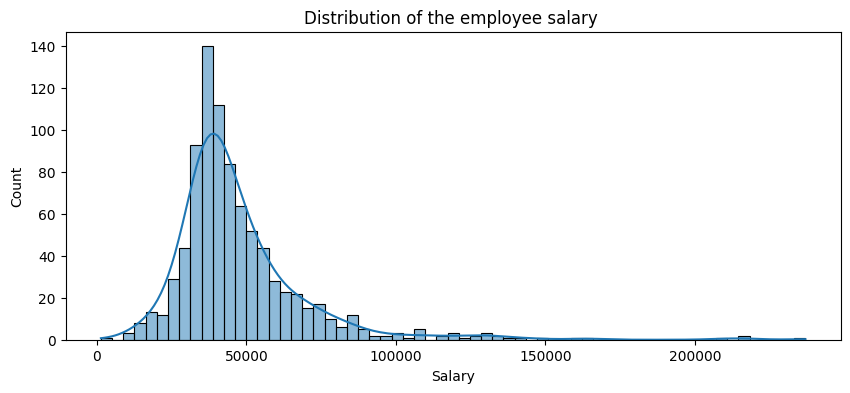

In [9]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'Salary', data = holiday_df, kde = True)
plt.title("Distribution of the employee salary ")

Text(0.5, 1.0, 'Distribution of the salary of employees who opted and not opted ')

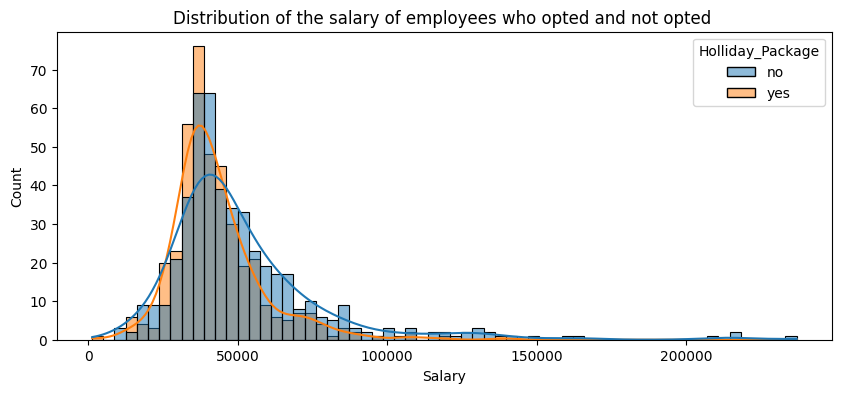

In [10]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'Salary', data = holiday_df, kde = True, hue = 'Holliday_Package')
plt.title("Distribution of the salary of employees who opted and not opted ")

1. Some employees with salary below 150000 have opted while some have not opted the holiday package.
2. Employees with salary 150000 and above have not opted the holiday package.

**Salary above 150000 is a separator between employess who have not opted the holiday package and those who have opted the package**

Text(0.5, 1.0, 'Salary of employees opted and not opted the Holliday_Package ')

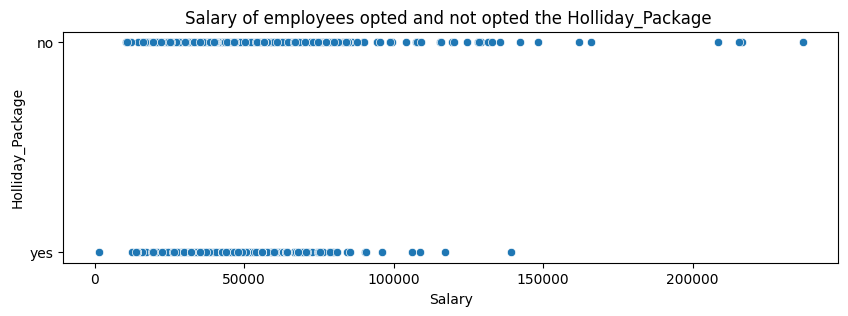

In [11]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'Salary', y = 'Holliday_Package', data = holiday_df)
plt.title("Salary of employees opted and not opted the Holliday_Package ")

In [12]:
print('Number of employees having different age - \n{}\n'.format(holiday_df['age'].value_counts()))

Number of employees having different age - 
age
44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
41    26
47    26
39    25
42    24
26    24
46    24
45    23
49    23
51    22
50    21
37    21
43    21
48    20
29    19
30    19
27    19
56    18
57    18
25    17
55    17
24    16
58    16
59    14
54    14
52    13
21    12
23    11
60    10
53    10
22     9
20     8
61     8
62     3
Name: count, dtype: int64



Text(0.5, 1.0, 'Number of employees having different age ')

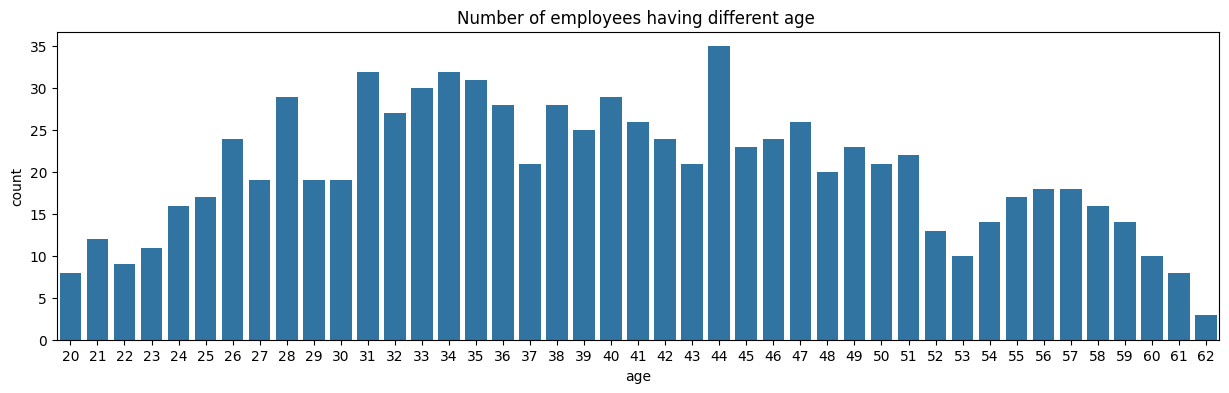

In [13]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'age', data = holiday_df)
plt.title("Number of employees having different age ")

Text(0.5, 1.0, 'Number of employees having different age and opting holiday package')

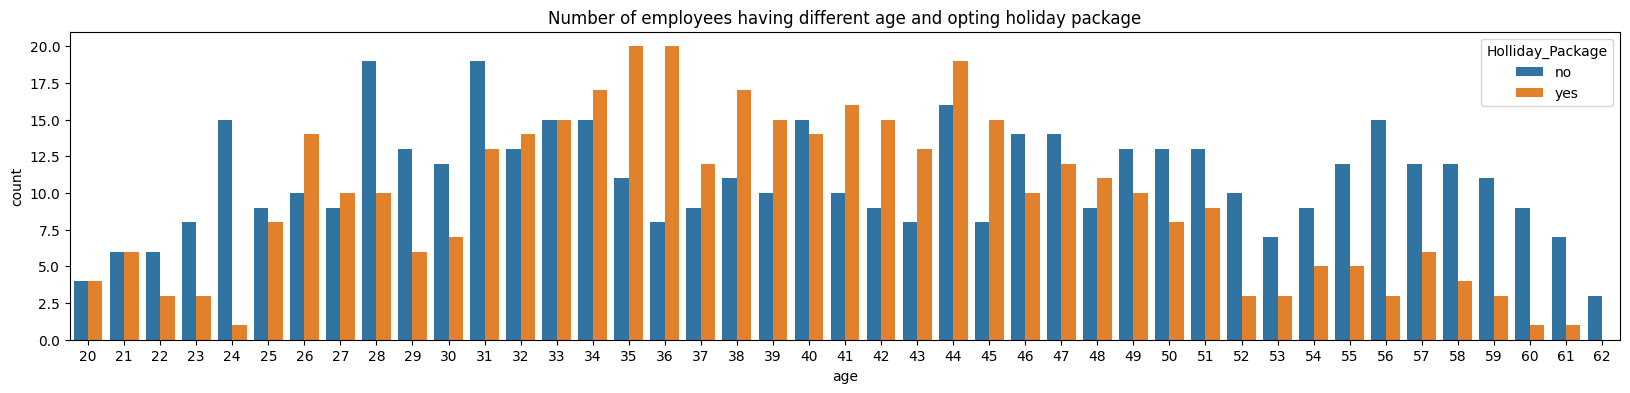

In [14]:
plt.figure(figsize = (20, 4))
sns.countplot(x = 'age', data = holiday_df, hue = 'Holliday_Package')
plt.title("Number of employees having different age and opting holiday package")

1. Majority of employess of age 20, 21, 26, 27, 32 - 39, 41 - 45 and 48 are those who opted the holiday package.
2. Majority of employess of age 22, 23, 24, 25, 46, 47, and 49 onwards are those who have not opted the holiday package.

Text(0.5, 1.0, 'Age of the employees opted and not opted the holiday package ')

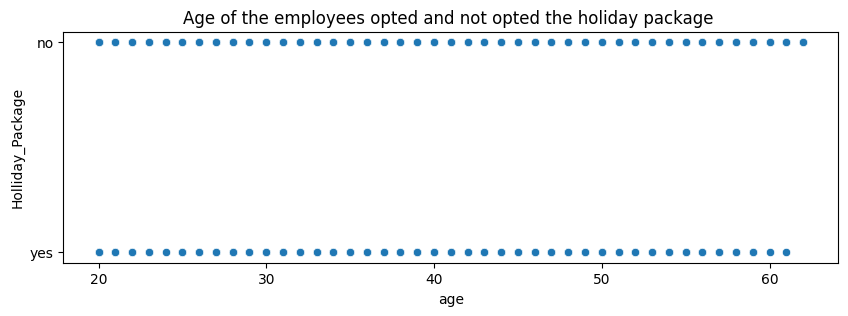

In [15]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'age', y = 'Holliday_Package', data = holiday_df)
plt.title("Age of the employees opted and not opted the holiday package ")

In [16]:
print('Number of employees having different years of formal education - \n{}\n\n'.format(holiday_df['educ'].value_counts()))
print('Percentage of employees having different years of formal education - \n{}\n'.format(holiday_df['educ'].value_counts(normalize= True)))

Number of employees having different years of formal education - 
educ
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: count, dtype: int64


Percentage of employees having different years of formal education - 
educ
8     0.180046
12    0.142202
9     0.130734
11    0.114679
10    0.103211
5     0.076835
4     0.057339
13    0.049312
7     0.035550
14    0.028670
6     0.024083
15    0.017202
3     0.012615
16    0.011468
2     0.006881
17    0.003440
19    0.002294
21    0.001147
18    0.001147
1     0.001147
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of employees having different years of formal education')

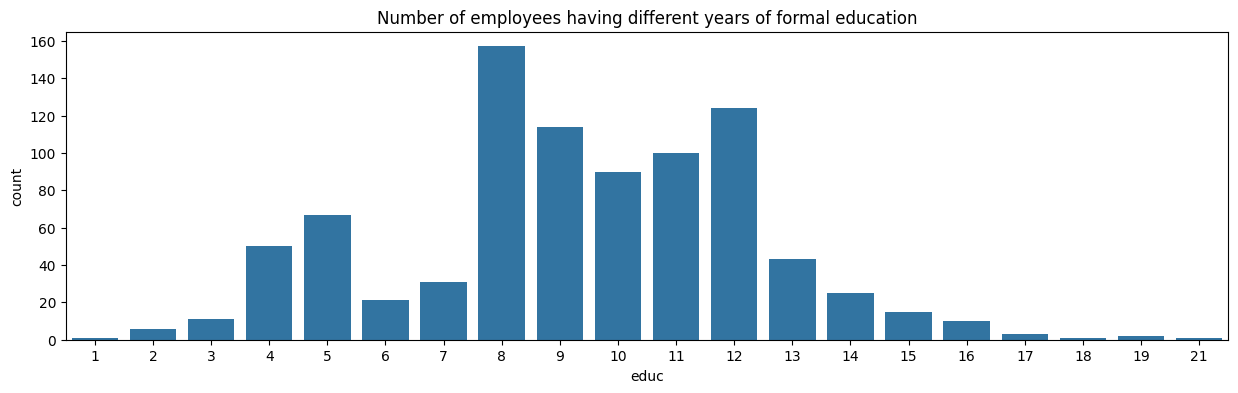

In [17]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'educ', data = holiday_df)
plt.title("Number of employees having different years of formal education")

Text(0.5, 1.0, 'Number of employees having different years of formal education and opting holiday package')

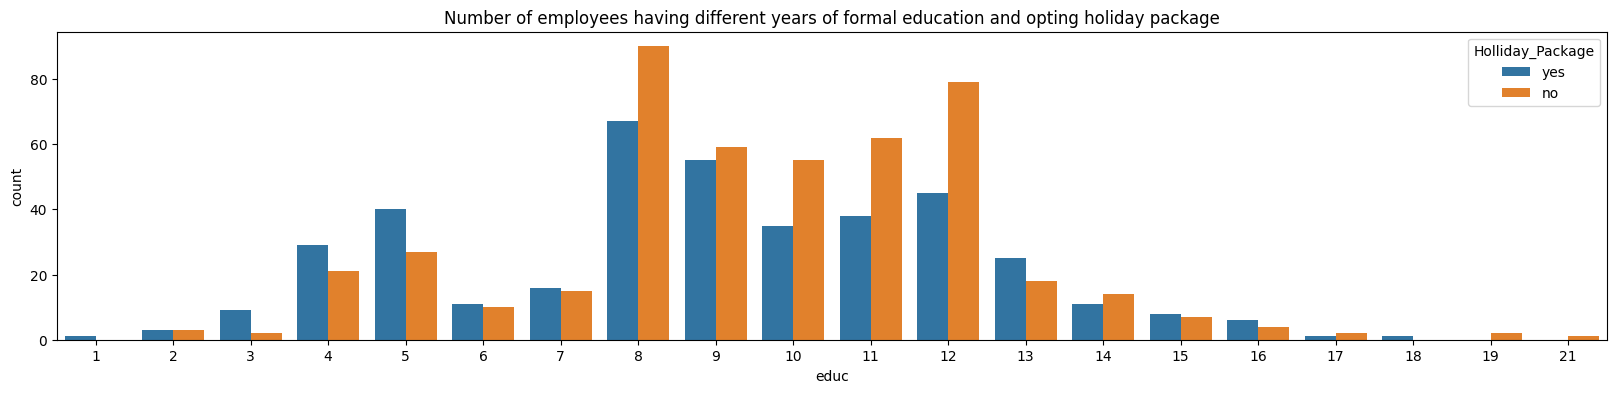

In [18]:
plt.figure(figsize = (20, 4))
sns.countplot(x = 'educ', data = holiday_df, hue = 'Holliday_Package')
plt.title("Number of employees having different years of formal education and opting holiday package")

1. Most of the employees having 1, 2, 3, 4, 5, 6, 7, 13, 15, 16 and 18 years of formal education have opted the holiday package.

2. Most of the employees having 8, 9, 10, 11, 12, 14, 19 and 21 years of formal education have not opted the holiday package

Text(0.5, 1.0, 'employees having different years of formal education and opting holiday package')

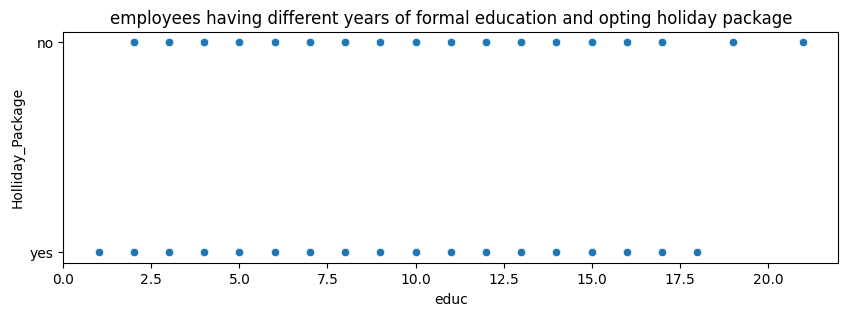

In [19]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'educ', y = 'Holliday_Package', data = holiday_df)
plt.title("employees having different years of formal education and opting holiday package")

In [20]:
# Number of employees having children younger than 7 years

print('Number of employees having children younger than 7 years - \n{}\n\n'.format(holiday_df['no_young_children'].value_counts()))
print('Percentage of employees having children younger than 7 years - \n{}\n'.format(holiday_df['no_young_children'].value_counts(normalize= True)))

Number of employees having children younger than 7 years - 
no_young_children
0    665
1    147
2     55
3      5
Name: count, dtype: int64


Percentage of employees having children younger than 7 years - 
no_young_children
0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of employees having children younger than 7 years')

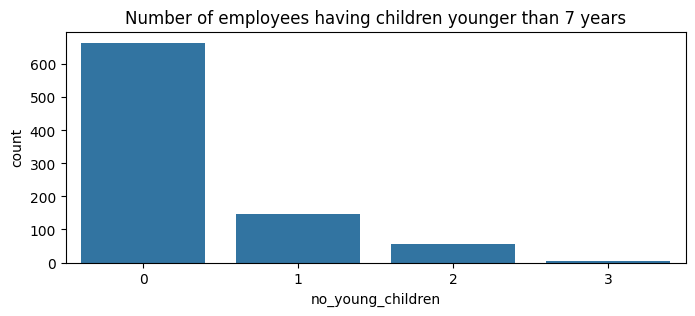

In [21]:
plt.figure(figsize = (8, 3))
sns.countplot(x = 'no_young_children', data = holiday_df)
plt.title("Number of employees having children younger than 7 years")

Text(0.5, 1.0, 'Number of employees having children younger than 7 years and opting holiday package')

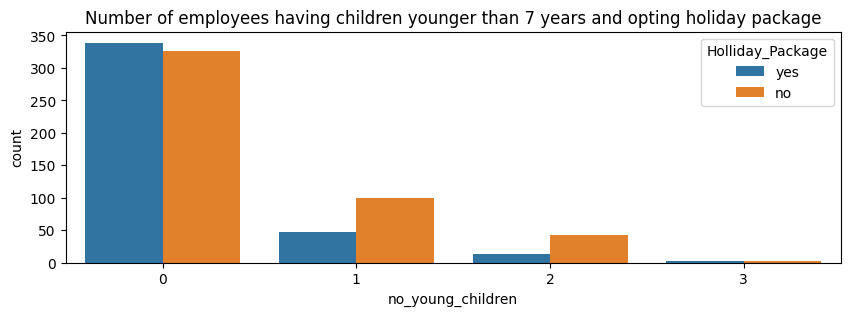

In [22]:
plt.figure(figsize = (10, 3))
sns.countplot(x = 'no_young_children', data = holiday_df, hue = 'Holliday_Package')
plt.title("Number of employees having children younger than 7 years and opting holiday package")

Most of the employees having no children younger than 7 years have opted for the holiday package

Text(0.5, 1.0, 'Number of employees having children younger than 7 years and opting holiday package')

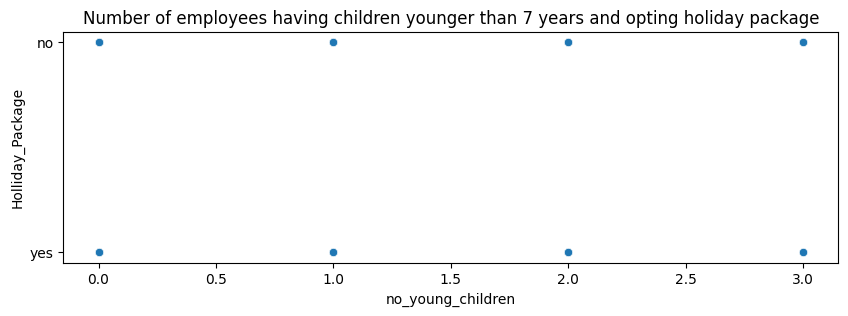

In [23]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'no_young_children', y = 'Holliday_Package', data = holiday_df)
plt.title("Number of employees having children younger than 7 years and opting holiday package")

In [24]:
# Number of employees having children older than 7 years

print('Number of employees having children older than 7 years - \n{}\n\n'.format(holiday_df['no_older_children'].value_counts()))
print('Percentage of employees having children older than 7 years - \n{}\n'.format(holiday_df['no_older_children'].value_counts(normalize= True)))

Number of employees having children older than 7 years - 
no_older_children
0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: count, dtype: int64


Percentage of employees having children older than 7 years - 
no_older_children
0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
5    0.002294
6    0.002294
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of employees having children older than 7 years')

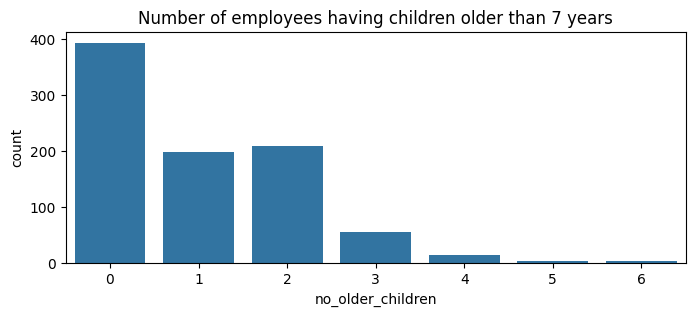

In [25]:
plt.figure(figsize = (8, 3))
sns.countplot(x = 'no_older_children', data = holiday_df)
plt.title("Number of employees having children older than 7 years")

Text(0.5, 1.0, 'Number of employees having children older than 7 years and opting holiday package')

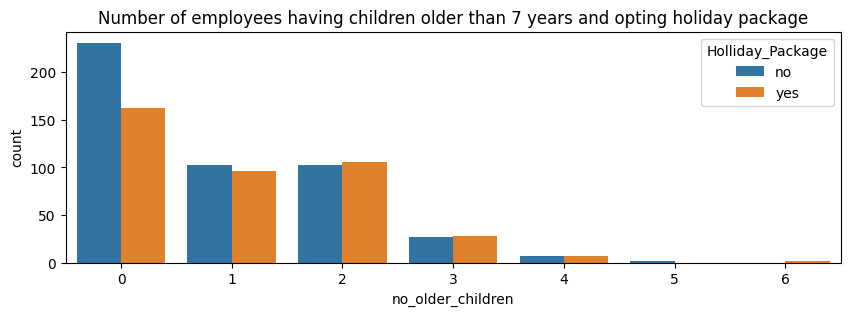

In [26]:
plt.figure(figsize = (10, 3))
sns.countplot(x = 'no_older_children', data = holiday_df, hue = 'Holliday_Package')
plt.title("Number of employees having children older than 7 years and opting holiday package")

1. Majority of the employees having 2, 3 and 6 children above 7 years have opted the holiday package.
2. Majority of the employees having at least 1 children above 7 years have not opted the holiday package.

Text(0.5, 1.0, 'Employees having children older than 7 years and opting holiday package')

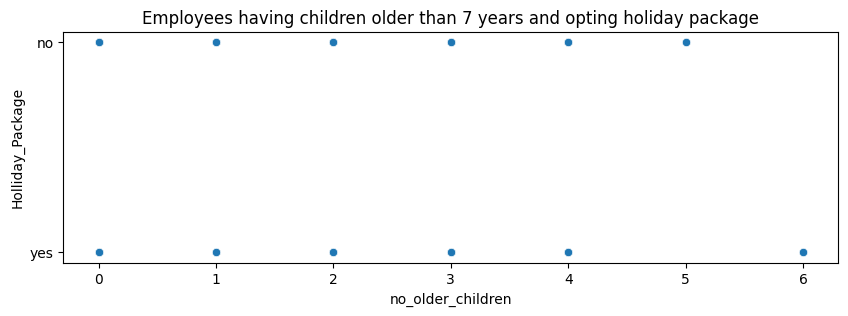

In [27]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'no_older_children', y = 'Holliday_Package', data = holiday_df)
plt.title("Employees having children older than 7 years and opting holiday package")

In [28]:
print('Number of foreign employees - \n{}\n'.format(holiday_df['foreign'].value_counts()))
print('Percentage of foreign employees - \n{}\n'.format(holiday_df['foreign'].value_counts(normalize = True)))

Number of foreign employees - 
foreign
no     656
yes    216
Name: count, dtype: int64

Percentage of foreign employees - 
foreign
no     0.752294
yes    0.247706
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of foreign employees')

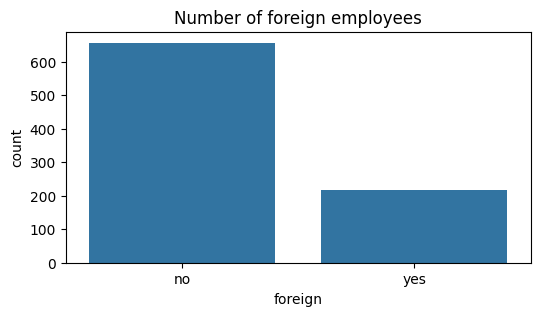

In [29]:
plt.figure(figsize = (6, 3))
sns.countplot(x = 'foreign', data = holiday_df)
plt.title("Number of foreign employees")

Text(0.5, 1.0, 'Number of foreign employees and opting holiday package')

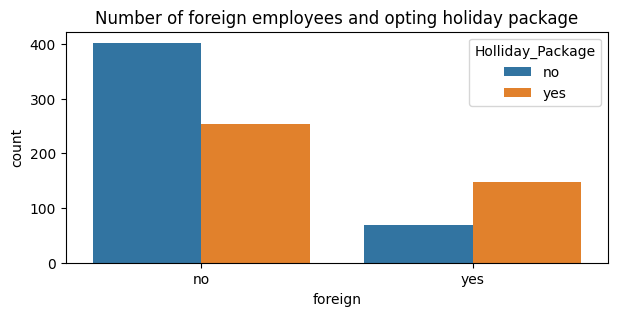

In [30]:
plt.figure(figsize = (7, 3))
sns.countplot(x = 'foreign', data = holiday_df, hue = 'Holliday_Package')
plt.title("Number of foreign employees and opting holiday package")

1. Most of the foreign employees have opted the holliday package.
2. Around 1/3rd of the domestic employees have opted the holiday package.

Text(0.5, 1.0, 'Foreign employees and opting holiday package')

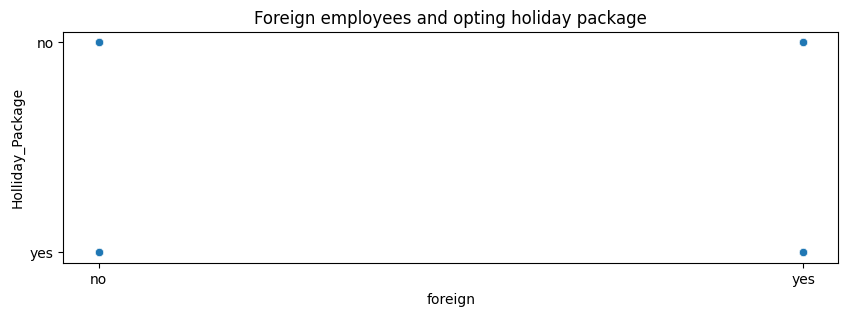

In [31]:
plt.figure(figsize = (10, 3))
sns.scatterplot(x = 'foreign', y = 'Holliday_Package', data = holiday_df)
plt.title("Foreign employees and opting holiday package")

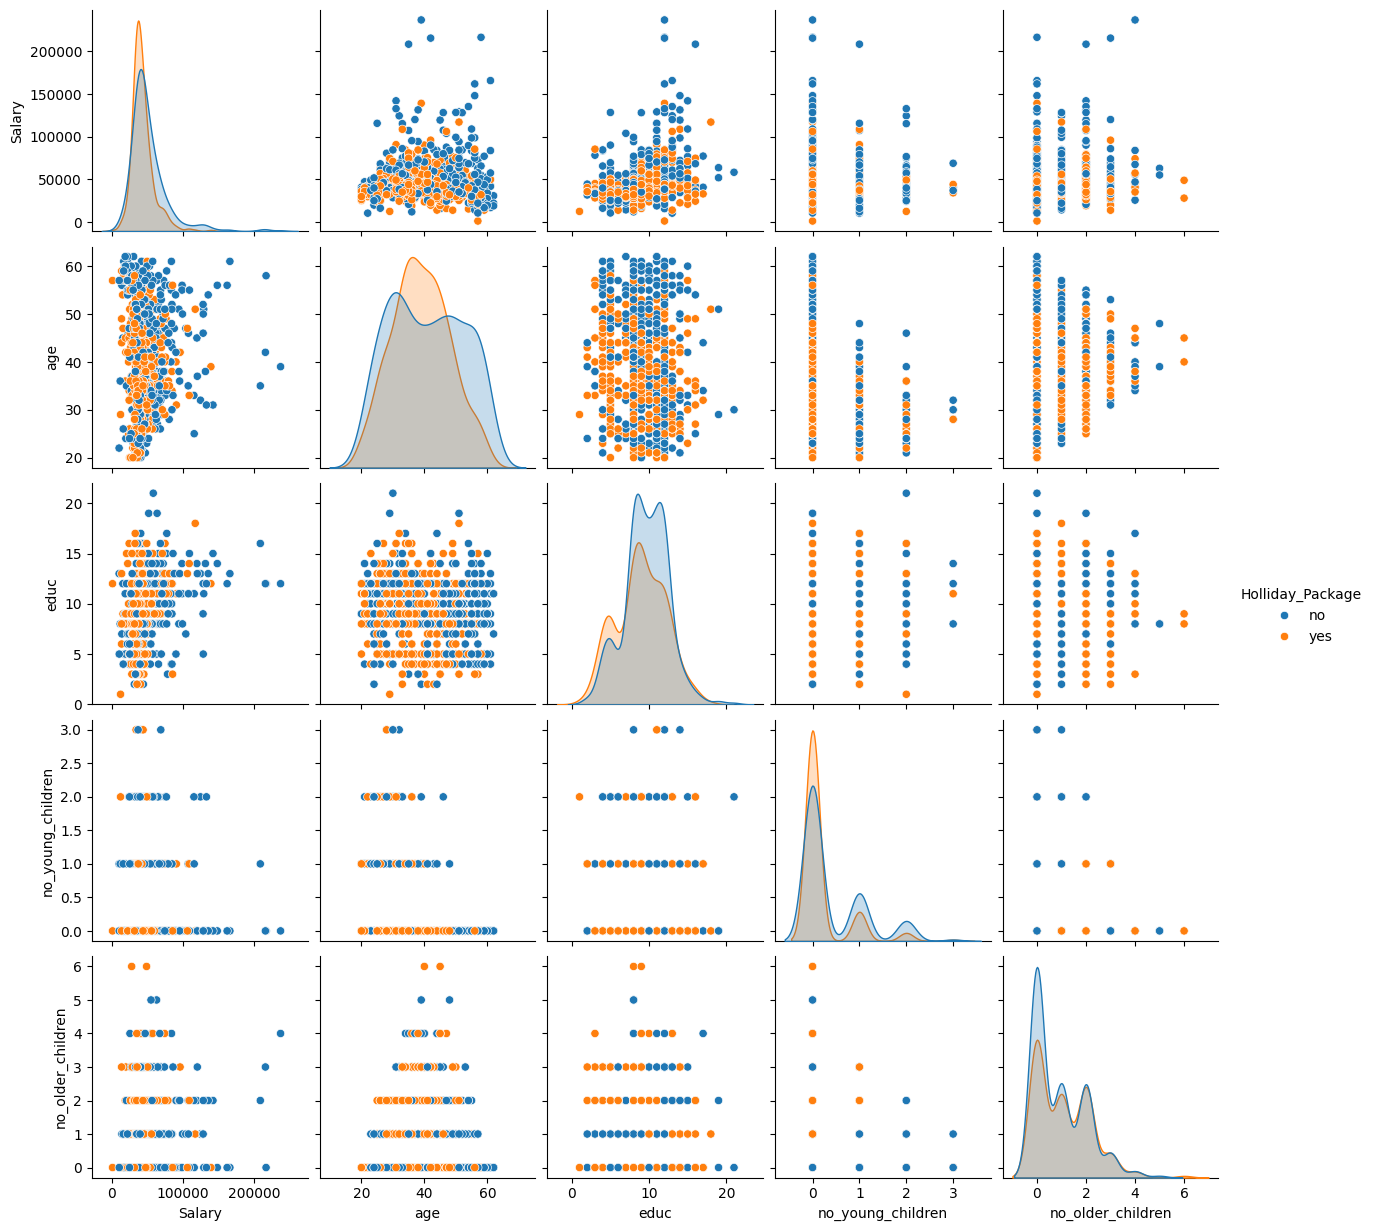

In [32]:
# pair plot exhibiting the correlation between features in holiday_df

sns.pairplot(holiday_df, hue = 'Holliday_Package')

In [33]:
holiday_df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


<Axes: >

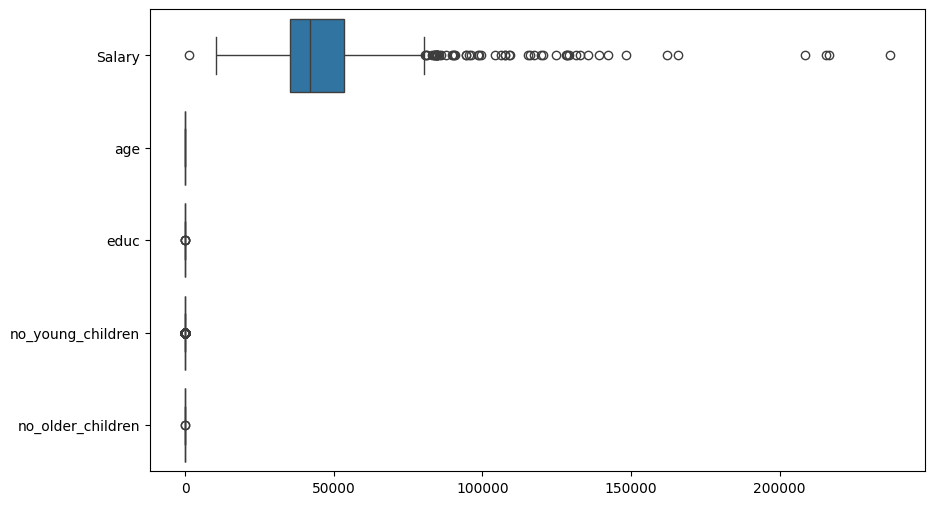

In [34]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = holiday_df, orient = 'h')

Text(0.5, 1.0, 'Heatmap displaying the correlation between the features in holiday_df')

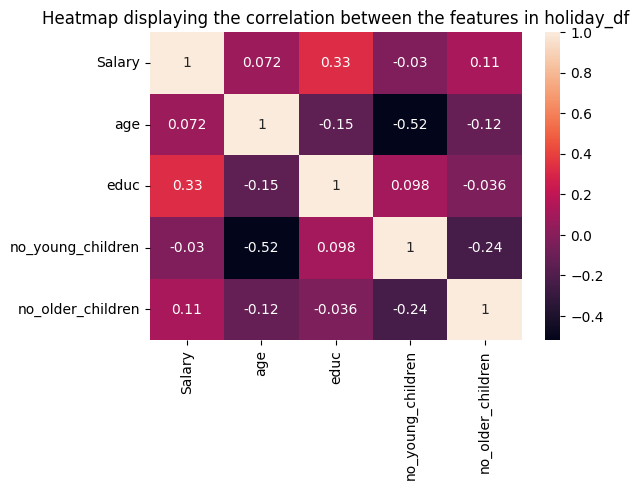

In [35]:
plt.figure(figsize = (6, 4))
sns.heatmap(holiday_df[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].corr(), annot = True)
plt.title("Heatmap displaying the correlation between the features in holiday_df")

In [36]:
# Converting the object types to categorical types

for feature in holiday_df.columns:
  if holiday_df[feature].dtype == 'object':
    print('feature: ', feature)
    print(pd.Categorical(holiday_df[feature].unique()))
    print(pd.Categorical(holiday_df[feature].unique()).codes)
    holiday_df[feature] = pd.Categorical(holiday_df[feature]).codes
    print('\n\n')

feature:  Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]



feature:  foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]





In [37]:
holiday_df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


In [38]:
# Separating the dependent and independent variables

X = holiday_df.drop(columns = ['Holliday_Package'])
y = holiday_df['Holliday_Package']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 121)

In [40]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign
425,39218,34,9,0,2,0
870,55958,41,10,0,1,1
526,62674,28,14,1,1,0
686,33608,41,7,0,0,1
535,51543,33,7,0,2,0
...,...,...,...,...,...,...
500,35095,35,13,0,2,0
607,25324,26,11,0,0,0
264,25118,58,8,0,0,0
469,35093,27,13,1,1,0


In [41]:
y_train

,Holliday_Package
425,1
870,1
526,0
686,1
535,0
...,...
500,1
607,1
264,1
469,1


In [42]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign
605,38268,33,9,1,1,0
187,36832,40,8,0,2,0
132,50003,57,8,0,0,0
522,55880,56,12,0,0,0
446,54626,52,10,0,1,0
...,...,...,...,...,...,...
655,39807,29,10,0,0,0
356,53100,41,9,0,1,0
121,35982,52,9,0,2,0
51,35136,32,8,0,1,0


In [43]:
y_test

,Holliday_Package
605,1
187,0
132,1
522,0
446,0
...,...
655,0
356,0
121,0
51,1


In [44]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_train_scaled

array([[-0.36820129, -0.57321902, -0.08062525, -0.51081754,  0.88488875,
        -0.5760883 ],
       [ 0.34972231,  0.0942599 ,  0.25394212, -0.51081754, -0.02078598,
         1.73584501],
       [ 0.63774949, -1.14534381,  1.59221161,  1.12058927, -0.02078598,
        -0.5760883 ],
       ...,
       [-0.97290396,  1.71528015, -0.41519262, -0.51081754, -0.92646071,
        -0.5760883 ],
       [-0.54510898, -1.24069795,  1.25764423,  1.12058927, -0.02078598,
        -0.5760883 ],
       [-0.6531835 , -0.95463555,  0.58850949,  1.12058927, -0.92646071,
        -0.5760883 ]])

In [45]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-4.08943664e-01, -6.68573153e-01, -8.06252518e-02,
         1.12058927e+00, -2.07859774e-02, -5.76088300e-01],
       [-4.70528986e-01, -1.09422775e-03, -4.15192623e-01,
        -5.10817542e-01,  8.84888751e-01, -5.76088300e-01],
       [ 9.43319298e-02,  1.61992602e+00, -4.15192623e-01,
        -5.10817542e-01, -9.26460706e-01, -5.76088300e-01],
       ...,
       [-5.06982694e-01,  1.14315536e+00, -8.06252518e-02,
        -5.10817542e-01,  8.84888751e-01, -5.76088300e-01],
       [-5.43264854e-01, -7.63927286e-01, -4.15192623e-01,
        -5.10817542e-01, -2.07859774e-02, -5.76088300e-01],
       [-8.11049499e-01,  1.52457189e+00,  1.25764423e+00,
        -5.10817542e-01, -9.26460706e-01, -5.76088300e-01]])

**Logistic Regression**

In [46]:
# Create LogisticRegression model

logistic_model = LogisticRegression(random_state = 121)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=121)

In [47]:
# Prediction of logistic_model on train data

y_train_predict = logistic_model.predict(X_train_scaled)
y_train_predict

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [48]:
# logistic_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

,0,1
0,231,83
1,113,183


In [49]:
# logistic_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       314
           1       0.69      0.62      0.65       296

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



In [50]:
# Probability of the predicted classes on train data

y_train_predict_prob = logistic_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.40014289, 0.59985711],
       [0.24201433, 0.75798567],
       [0.71418767, 0.28581233],
       ...,
       [0.5775024 , 0.4224976 ],
       [0.57714723, 0.42285277],
       [0.6141988 , 0.3858012 ]])

In [51]:
# roc_auc_score of logistic_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of logistic_model on train data: {}'.format(roc_train))

roc_auc_score of logistic_model on train data: 0.7368630573248407


Text(0.5, 1.0, 'ROC curve of logistic_model on train data.')

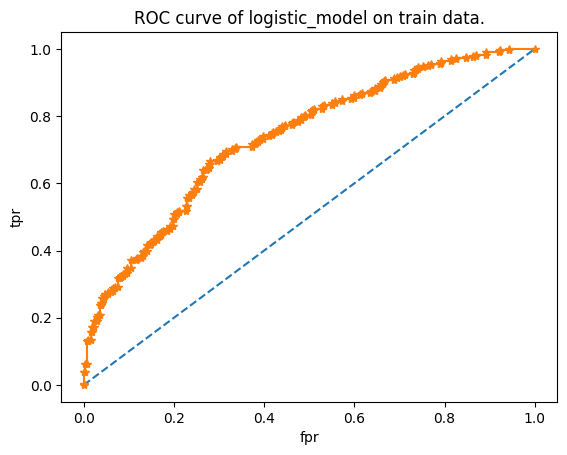

In [52]:
# roc_curve of logistic_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of logistic_model on train data.')

In [53]:
# Prediction of logistic_model on test data

y_test_predict = logistic_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int8)

In [54]:
# logistic_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

,0,1
0,114,43
1,37,68


In [55]:
# logistic_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       157
           1       0.61      0.65      0.63       105

    accuracy                           0.69       262
   macro avg       0.68      0.69      0.68       262
weighted avg       0.70      0.69      0.70       262



In [56]:
# Probability of the predicted classes on test data

y_test_predict_prob = logistic_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.69911357, 0.30088643],
       [0.46227467, 0.53772533],
       [0.69502573, 0.30497427],
       [0.66948164, 0.33051836],
       [0.65283217, 0.34716783],
       [0.91407715, 0.08592285],
       [0.57606257, 0.42393743],
       [0.58730169, 0.41269831],
       [0.54894273, 0.45105727],
       [0.58884586, 0.41115414],
       [0.51241481, 0.48758519],
       [0.68252659, 0.31747341],
       [0.55190332, 0.44809668],
       [0.57962492, 0.42037508],
       [0.60623558, 0.39376442],
       [0.48201916, 0.51798084],
       [0.35725608, 0.64274392],
       [0.17781624, 0.82218376],
       [0.62202412, 0.37797588],
       [0.63944935, 0.36055065],
       [0.42072211, 0.57927789],
       [0.86281959, 0.13718041],
       [0.52678971, 0.47321029],
       [0.25284543, 0.74715457],
       [0.25149336, 0.74850664],
       [0.57647489, 0.42352511],
       [0.61865077, 0.38134923],
       [0.65710436, 0.34289564],
       [0.55949817, 0.44050183],
       [0.1897237 , 0.8102763 ],
       [0.

In [57]:
# roc_auc_score of logistic_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of logistic_model on test data: {}'.format(roc_test))

roc_auc_score of logistic_model on test data: 0.721868365180467


Text(0.5, 1.0, 'ROC curve of logistic_model on test data.')

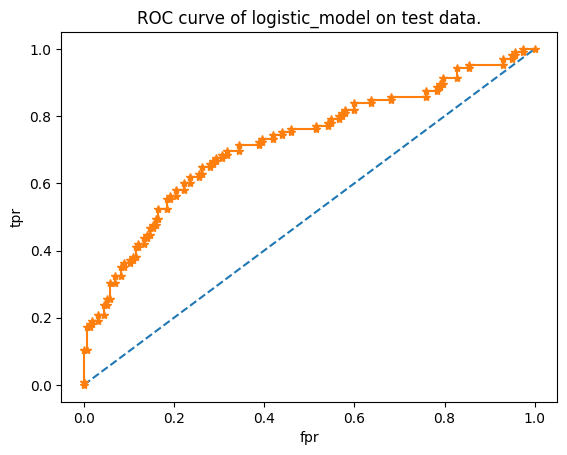

In [58]:
# roc_curve of logistic_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of logistic_model on test data.')

In [59]:
print("Coefficient of independent features in X- \n")

for i, col in enumerate(X.columns):
  print(f"Coefficient of {col}: {logistic_model.coef_[0][i]}")

Coefficient of independent features in X- 

Coefficient of Salary: -0.5188483327320919
Coefficient of age: -0.4461362986877393
Coefficient of educ: 0.15401399122774018
Coefficient of no_young_children: -0.8166642841992912
Coefficient of no_older_children: -0.022835475618499173
Coefficient of foreign: 0.5773818042116046


In [60]:
intercept = logistic_model.intercept_

print(f"intercept of logistic_model: {intercept}")

intercept of logistic_model: [-0.09382393]


* The coefficients of the independent features in the logistic regression model indicate the direction and magnitude of the impact each feature has on the log-odds of the outcome (whether or not an employee opts for a holiday package).

* A negative coefficient suggests that as the feature increases, the likelihood of opting for a holiday package decreases, while a positive coefficient indicates the opposite.

* These coefficients suggest that **higher salary, older age, and having young or older children** are associated with a lower likelihood of opting for a holiday package.

* Conversely, **higher education and being a foreign employee** are associated with a higher likelihood of opting for a holiday package.

* The magnitude of the coefficient reflects the strength of the association. The **number of young children** has a relatively large negative coefficient (-0.8167), indicating a strong negative impact on the likelihood of opting for a holiday package.

**Training Set Performance:**
1. The LogisticRegression model achieves an accuracy of 0.68 on the training set.
2. Class 0 metrics are moderate (precision=0.67, recall=0.74, F1-score=0.70), while Class 1 metrics are weak (precision=0.69, recall=0.62, F1-score=0.65),
3. The ROC AUC score is 0.74, demonstrating moderate predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.69 .
2. Class 0 metrics are moderate (precision=0.75, recall=0.73, F1-score=0.74), while class 1 metrics are weak (precision=0.61, recall=0.65, F1-score=0.63).
3. The ROC AUC score is 0.72, demonstrating moderate predictive power.

**Analysis:** The LogisticRegression model maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

In [61]:
# Performing model tuning using GridSearchCV

'''
params = {'penalty': ['l1', 'l2', 'None'],
          'solver': ['liblinear', 'newton-cholesky'],
          'max_iter': [100, 150, 200, 250, 300, 400, 450, 500, 1000]}
'''

params = {
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear'],
          'max_iter': [100, 150, 200, 250, 300, 400, 450, 500, 1000]
        }

grid_search = GridSearchCV(estimator = logistic_model, param_grid = params, cv = 3, n_jobs = 2)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters: ', grid_search.best_params_,'\n')
print('Estimator: ', grid_search.best_estimator_)

reg_logistic_model = grid_search.best_estimator_

Best parameters:  {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 

Estimator:  LogisticRegression(penalty='l1', random_state=121, solver='liblinear')


In [62]:
# Prediction of reg_logistic_model on train data

y_train_predict = reg_logistic_model.predict(X_train_scaled)
y_train_predict

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [63]:
# reg_logistic_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

,0,1
0,231,83
1,110,186


In [64]:
# reg_logistic_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       314
           1       0.69      0.63      0.66       296

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



In [65]:
# Probability of the predicted classes on train data

y_train_predict_prob = reg_logistic_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.39857573, 0.60142427],
       [0.24416149, 0.75583851],
       [0.71291014, 0.28708986],
       ...,
       [0.57523913, 0.42476087],
       [0.57781069, 0.42218931],
       [0.61483573, 0.38516427]])

In [66]:
# roc_auc_score of reg_logistic_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of reg_logistic_model on train data: {}'.format(roc_train))

roc_auc_score of reg_logistic_model on train data: 0.736970648992942


Text(0.5, 1.0, 'ROC curve of reg_logistic_model on train data.')

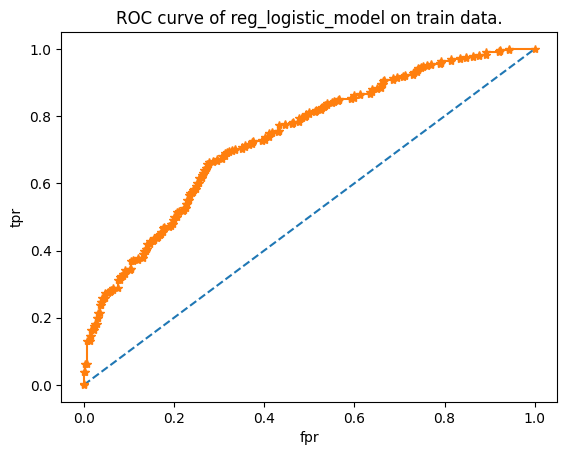

In [67]:
# roc_curve of reg_logistic_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_logistic_model on train data.')

In [68]:
# Prediction of reg_logistic_model on test data

y_test_predict = reg_logistic_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int8)

In [69]:
# reg_logistic_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

,0,1
0,114,43
1,37,68


In [70]:
# reg_logistic_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       157
           1       0.61      0.65      0.63       105

    accuracy                           0.69       262
   macro avg       0.68      0.69      0.68       262
weighted avg       0.70      0.69      0.70       262



In [71]:
# Probability of the predicted classes on test data

y_test_predict_prob = reg_logistic_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.69484069, 0.30515931],
       [0.45843467, 0.54156533],
       [0.69099657, 0.30900343],
       [0.66838984, 0.33161016],
       [0.64878965, 0.35121035],
       [0.91130691, 0.08869309],
       [0.57443748, 0.42556252],
       [0.58654289, 0.41345711],
       [0.5511737 , 0.4488263 ],
       [0.58975649, 0.41024351],
       [0.5125026 , 0.4874974 ],
       [0.67625654, 0.32374346],
       [0.55333983, 0.44666017],
       [0.58037057, 0.41962943],
       [0.60510711, 0.39489289],
       [0.48080363, 0.51919637],
       [0.35595047, 0.64404953],
       [0.17726617, 0.82273383],
       [0.62185175, 0.37814825],
       [0.63650065, 0.36349935],
       [0.41651988, 0.58348012],
       [0.85952711, 0.14047289],
       [0.52334091, 0.47665909],
       [0.25306816, 0.74693184],
       [0.25659046, 0.74340954],
       [0.57015222, 0.42984778],
       [0.6161764 , 0.3838236 ],
       [0.65488746, 0.34511254],
       [0.55683056, 0.44316944],
       [0.19128712, 0.80871288],
       [0.

In [72]:
# roc_auc_score of reg_logistic_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of reg_logistic_model on test data: {}'.format(roc_test))

roc_auc_score of reg_logistic_model on test data: 0.7227782832878374


Text(0.5, 1.0, 'ROC curve of reg_logistic_model on test data.')

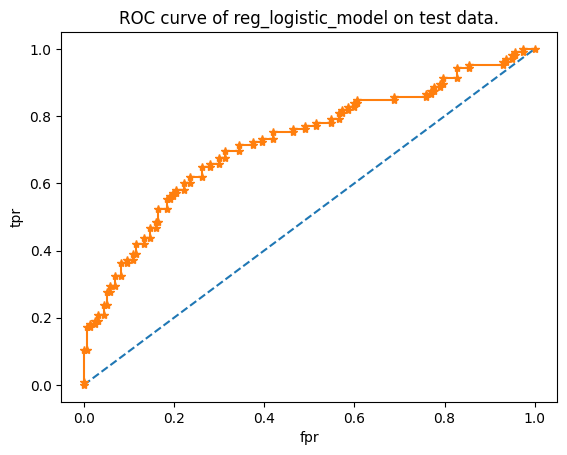

In [73]:
# roc_curve of reg_logistic_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_logistic_model on test data.')

In [74]:
print("Coefficient of independent features in X- \n")

for i, col in enumerate(X.columns):
  print(f"Coefficient of {col}: {reg_logistic_model.coef_[0][i]}")

Coefficient of independent features in X- 

Coefficient of Salary: -0.5088402773614559
Coefficient of age: -0.4355302500939415
Coefficient of educ: 0.1424168214528887
Coefficient of no_young_children: -0.8014630000034707
Coefficient of no_older_children: -0.012145075300057045
Coefficient of foreign: 0.5692045574008445


In [75]:
intercept = reg_logistic_model.intercept_

print(f"The intercept of reg_logistic_model: {intercept}")

The intercept of reg_logistic_model: [-0.0848666]


* The coefficients of the independent features in the regularized logistic regression model indicate the direction and magnitude of the impact each feature has on the log-odds of the outcome (whether or not an employee opts for a holiday package).

* A negative coefficient suggests that as the feature increases, the likelihood of opting for a holiday package decreases, while a positive coefficient indicates the opposite.

* These values suggest that **higher salary, older age, and having young or older children are associated with a lower likelihood of opting for a holiday package**.

* Conversely, **higher education and being a foreign employee are associated with a higher likelihood of opting for a holiday package**.

* The magnitude of the coefficient reflects the strength of the association.
The **number of young children** has a relatively large negative coefficient (-0.80), indicating a strong negative impact on the likelihood of opting for a holiday package.

**Training Set Performance:**
1. The regularized LogisticRegression model achieves an accuracy of 0.68 on the training set.
2. Class 0 metrics are moderate (precision=0.68, recall=0.74, F1-score=0.71), while Class 1 metrics are weak (precision=0.69, recall=0.63, F1-score=0.66),
3. The ROC AUC score is 0.74, demonstrating moderate predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.69.
2. Class 0 metrics are moderate (precision=0.75, recall=0.73, F1-score=0.74), while class 1 metrics are weak (precision=0.61, recall=0.65, F1-score=0.63).
3. The ROC AUC score is 0.72, demonstrating moderate predictive power.

**Analysis:** The regularized LogisticRegression model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities.

**Performing Linear Discriminant Analysis -**

In [76]:
# Create LinearDiscriminantAnalysis model

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [77]:
# Prediction of lda_model on train data

y_train_predict = lda_model.predict(X_train_scaled)
y_train_predict

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [78]:
# lda_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

,0,1
0,232,82
1,116,180


In [79]:
# lda_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       314
           1       0.69      0.61      0.65       296

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [80]:
# Probability of the predicted classes on train data

y_train_predict_prob = lda_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.41255639, 0.58744361],
       [0.22768143, 0.77231857],
       [0.68799032, 0.31200968],
       ...,
       [0.60446005, 0.39553995],
       [0.57647842, 0.42352158],
       [0.6167655 , 0.3832345 ]])

In [81]:
# roc_auc_score of lda_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of lda_model on train data: {}'.format(roc_train))

roc_auc_score of lda_model on train data: 0.7377991048373213


Text(0.5, 1.0, 'ROC curve of lda_model on train data.')

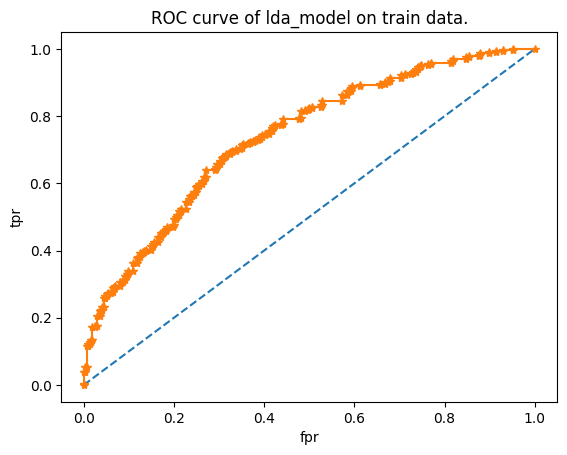

In [82]:
# roc_curve of lda_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of lda_model on train data.')

In [83]:
# Prediction of lda_model on test data

y_test_predict = lda_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int8)

In [84]:
# lda_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

,0,1
0,114,43
1,38,67


In [85]:
# lda_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       157
           1       0.61      0.64      0.62       105

    accuracy                           0.69       262
   macro avg       0.68      0.68      0.68       262
weighted avg       0.69      0.69      0.69       262



In [86]:
# Probability of the predicted classes on test data

y_test_predict_prob = lda_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.69611118, 0.30388882],
       [0.47760531, 0.52239469],
       [0.69554793, 0.30445207],
       [0.66349692, 0.33650308],
       [0.64830592, 0.35169408],
       [0.90598213, 0.09401787],
       [0.60457793, 0.39542207],
       [0.59511065, 0.40488935],
       [0.55261046, 0.44738954],
       [0.50978949, 0.49021051],
       [0.51832498, 0.48167502],
       [0.68983485, 0.31016515],
       [0.55739632, 0.44260368],
       [0.58557753, 0.41442247],
       [0.56996449, 0.43003551],
       [0.47625405, 0.52374595],
       [0.34171611, 0.65828389],
       [0.1811776 , 0.8188224 ],
       [0.6234108 , 0.3765892 ],
       [0.63823694, 0.36176306],
       [0.42787676, 0.57212324],
       [0.85111311, 0.14888689],
       [0.5571087 , 0.4428913 ],
       [0.25853339, 0.74146661],
       [0.27256105, 0.72743895],
       [0.58529553, 0.41470447],
       [0.61577347, 0.38422653],
       [0.66034925, 0.33965075],
       [0.55223539, 0.44776461],
       [0.18451616, 0.81548384],
       [0.

In [87]:
# roc_auc_score of lda_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of lda_model on test data: {}'.format(roc_test))

roc_auc_score of lda_model on test data: 0.7230815893236275


Text(0.5, 1.0, 'ROC curve of lda_model on test data.')

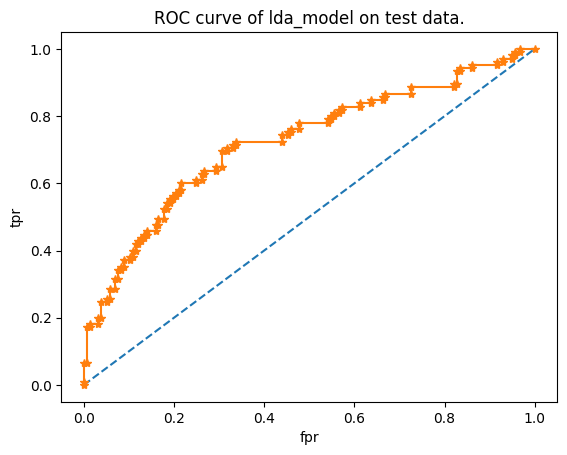

In [88]:
# roc_curve of lda_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of lda_model on test data.')

In [89]:
print("Coefficient of features in X:")

for i, col in enumerate(X.columns):
  print(f"The coefficient of {col}: {lda_model.coef_[0][i]}")

Coefficient of features in X:
The coefficient of Salary: -0.4164211454413854
The coefficient of age: -0.4437891154565785
The coefficient of educ: 0.15685119693767713
The coefficient of no_young_children: -0.7729102668431983
The coefficient of no_older_children: -0.02141287735905967
The coefficient of foreign: 0.6018125113564498


In [90]:
intercept = lda_model.intercept_

print(f"The intercept of lda_model: {intercept}")

The intercept of lda_model: [-0.0708326]


* The coefficients of the independent features in the Linear Discriminant Analysis (LDA) model indicate the direction and magnitude of each feature's impact on the model's decision boundary.

* A coefficient reveals how much the LDA model shifts its classification threshold due to a one-unit change in the corresponding feature.

* These coefficients suggest that **higher salary, older age, and having more young or older children are associated with a decreased likelihood of opting for a holiday package**.

* Conversely, **higher education and being a foreign employee are associated with an increased likelihood of opting for a holiday package**.

* The absolute value of the coefficient indicates the feature's importance,  **foreign has a coefficient of 0.6018, suggesting a notable positive influence, while no_older_children has a very small coefficient of -0.0214, indicating a minimal impact** .

In [91]:
lda_model.explained_variance_ratio_

array([1.])

**Training Set Performance:**
1. The LinearDiscriminantAnalysis model achieves an accuracy of 0.68 on the training set.
2. Class 0 metrics are moderate (precision=0.67, recall=0.74, F1-score=0.70), while Class 1 metrics are weak (precision=0.69, recall=0.61, F1-score=0.65),
3. The ROC AUC score is 0.74, demonstrating moderate predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.69.
2. Class 0 metrics are moderate (precision=0.75, recall=0.73, F1-score=0.74), while class 1 metrics are weak (precision=0.61, recall=0.64, F1-score=0.62).
3. The ROC AUC score is 0.72, demonstrating moderate predictive power.

**Analysis:** The LinearDiscriminantAnalysis model maintains consistent performance across training and test sets, suggesting good generalization capabilities.

**Regularized Linear Discriminant Analysis**

In [92]:
# Performing model tuning using GridSearchCV

params = {
          'solver': ['lsqr', 'eigen'],
          'tol': [0.1, 0.001, 0.0001],
          'shrinkage': ['auto']
          }

grid_search = GridSearchCV(estimator = lda_model, param_grid = params, cv = 3, n_jobs = 2)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_,'\n')
print('Estimator: ', grid_search.best_estimator_)

reg_lda_model = grid_search.best_estimator_

Best parameters:  {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1} 

Estimator:  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.1)


In [93]:
# Prediction of reg_lda_model on train data

y_train_predict = reg_lda_model.predict(X_train_scaled)
y_train_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [94]:
# reg_lda_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

,0,1
0,80,234
1,21,275


In [95]:
# reg_lda_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.25      0.39       314
           1       0.54      0.93      0.68       296

    accuracy                           0.58       610
   macro avg       0.67      0.59      0.53       610
weighted avg       0.67      0.58      0.53       610



In [96]:
# Probability of the predicted classes on train data

y_train_predict_prob = reg_lda_model.predict_proba(X_train_scaled)
y_train_predict_prob

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([[0.15792175, 0.84207825],
       [0.00900688, 0.99099312],
       [0.51726205, 0.48273795],
       ...,
       [0.17716198, 0.82283802],
       [0.51948751, 0.48051249],
       [0.53381376, 0.46618624]])

In [97]:
# roc_auc_score of reg_lda_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_lda_model on train data: {}'.format(roc_train))

roc_auc_score of reg_lda_model on train data: 0.7009489585126527


Text(0.5, 1.0, 'ROC curve of reg_lda_model on train data.')

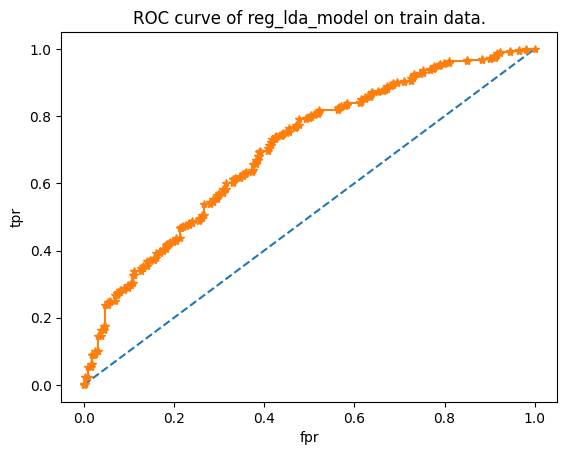

In [98]:
# roc_curve of reg_lda_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_lda_model on train data.')

In [99]:
# Prediction of reg_lda_model on test data

y_test_predict = reg_lda_model.predict(X_test_scaled)
y_test_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

In [100]:
# reg_lda_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

,0,1
0,35,122
1,10,95


In [101]:
# reg_lda_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.22      0.35       157
           1       0.44      0.90      0.59       105

    accuracy                           0.50       262
   macro avg       0.61      0.56      0.47       262
weighted avg       0.64      0.50      0.44       262



In [102]:
# Probability of the predicted classes on test data

y_test_predict_prob = reg_lda_model.predict_proba(X_test_scaled)
y_test_predict_prob

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([[0.53669128, 0.46330872],
       [0.16225671, 0.83774329],
       [0.17667989, 0.82332011],
       [0.16918845, 0.83081155],
       [0.16754382, 0.83245618],
       [0.8772469 , 0.1227531 ],
       [0.17634615, 0.82365385],
       [0.17076871, 0.82923129],
       [0.52883869, 0.47116131],
       [0.00908116, 0.99091884],
       [0.16142664, 0.83857336],
       [0.18243442, 0.81756558],
       [0.16639759, 0.83360241],
       [0.16778773, 0.83221227],
       [0.15609472, 0.84390528],
       [0.15439136, 0.84560864],
       [0.04961948, 0.95038052],
       [0.00923308, 0.99076692],
       [0.16872013, 0.83127987],
       [0.17331514, 0.82668486],
       [0.15445811, 0.84554189],
       [0.87448362, 0.12551638],
       [0.17193556, 0.82806444],
       [0.01014191, 0.98985809],
       [0.1468357 , 0.8531643 ],
       [0.1659108 , 0.8340892 ],
       [0.17188877, 0.82811123],
       [0.17313963, 0.82686037],
       [0.16371733, 0.83628267],
       [0.00915815, 0.99084185],
       [0.

In [103]:
# roc_auc_score of reg_lda_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_lda_model on test data: {}'.format(roc_test))

roc_auc_score of reg_lda_model on test data: 0.7037913254473763


Text(0.5, 1.0, 'ROC curve of new_lda_model on test data.')

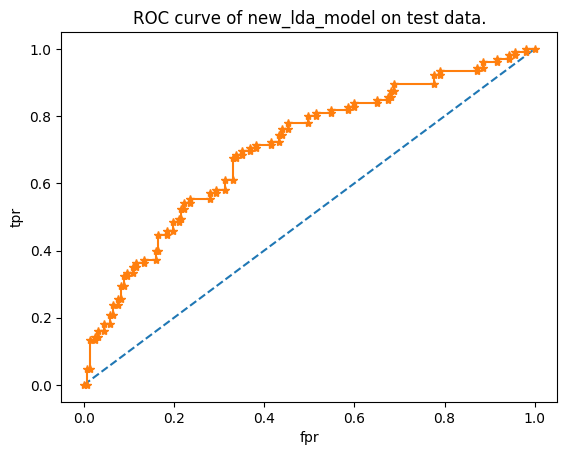

In [104]:
# roc_curve of reg_lda_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of new_lda_model on test data.')

In [105]:
print("Coefficient of features in X:")

for i, col in enumerate(X.columns):
  print(f"The coefficient of {col}: {reg_lda_model.coef_[0][i]}")

Coefficient of features in X:
The coefficient of Salary: -1.7884397446679294e-05
The coefficient of age: -0.03491962358847944
The coefficient of educ: 0.036658582107722326
The coefficient of no_young_children: -1.1040641100498947
The coefficient of no_older_children: 0.025346254279323244
The coefficient of foreign: 1.3239818525501459


In [106]:
intercept = reg_lda_model.intercept_

print(f"The intercept of reg_lda_model: {intercept}")

The intercept of reg_lda_model: [1.83303225]


* The coefficients of the independent features in the Linear Discriminant Analysis (LDA) model indicate the direction and magnitude of each feature's impact on the model's decision boundary.

* A coefficient reveals how much the LDA model shifts its classification threshold due to a one-unit change in the corresponding feature.

* These coefficients suggest that **higher salary, older age, and having more young children are associated with a decreased likelihood of opting for a holiday package**.

* Conversely, **higher education, having more older children and being a foreign employee are associated with an increased likelihood of opting for a holiday package**.


* The absolute value of the coefficient indicates the feature's importance. **foreign has a coefficient of 1.32, suggesting a notable positive influence, while older age has a very small coefficient of -0.035, indicating a minimal impact**.

In [107]:
lda_model.explained_variance_ratio_

array([1.])

**Training Set Performance:**
1. The regularized LinearDiscriminantAnalysis model achieves an accuracy of 0.58 on the training set.
2. Class 0 metrics are poor (precision=0.79, recall=0.25, F1-score=0.39), while Class 1 metrics are weak (precision=0.54, recall=0.93, F1-score=0.68),
3. The ROC AUC score is 0.70, demonstrating moderate predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.50 .
2. Class 0 metrics are poor (precision=0.78, recall=0.22, F1-score=0.35), while class 1 metrics are weak (precision=0.44, recall=0.90, F1-score=0.59).
3. The ROC AUC score is 0.70, demonstrating moderate predictive power.

**Analysis:** The regularized LinearDiscriminantAnalysis model maintains consistent performance across training and test sets, suggesting poor generalization capabilities. There is a drop in performance on the test set, particularly for class 0.

**K-Nearest Neighbors**

In [108]:
X = holiday_df[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign']]
y = holiday_df['Holliday_Package']

X

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0
...,...,...,...,...,...,...
867,40030,24,4,2,1,1
868,32137,48,8,0,0,1
869,25178,24,6,2,0,1
870,55958,41,10,0,1,1


In [109]:
y

,Holliday_Package
0,0
1,1
2,0
3,0
4,0
...,...
867,0
868,1
869,0
870,1


In [110]:
# KNeighborsClassifier model

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
# knn_model prediction on train data

y_train_predict = knn_model.predict(X_train)

In [112]:
# knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,213,101
1,83,213


In [113]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       314
           1       0.68      0.72      0.70       296

    accuracy                           0.70       610
   macro avg       0.70      0.70      0.70       610
weighted avg       0.70      0.70      0.70       610



In [114]:
y_train_predict_prob = knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of knn_model on train data: {}'.format(roc_score))

roc_auc_score of knn_model on train data: 0.7636533826820452


Text(0.5, 1.0, 'ROC curve of knn_model on training data.')

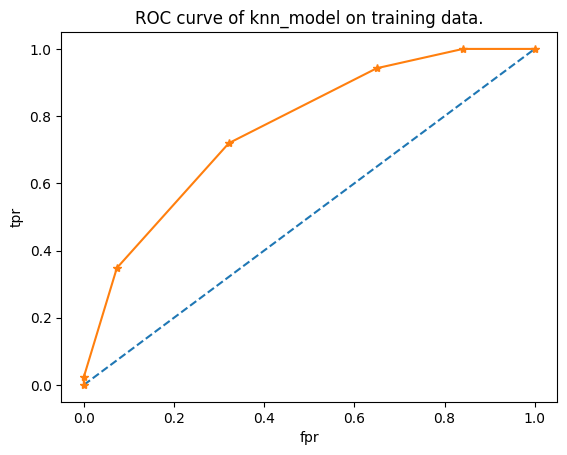

In [115]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of knn_model on training data.')

In [116]:
# knn_model prediction on test data

y_test_predict = knn_model.predict(X_test)

In [117]:
# knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,89,68
1,53,52


In [118]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       157
           1       0.43      0.50      0.46       105

    accuracy                           0.54       262
   macro avg       0.53      0.53      0.53       262
weighted avg       0.55      0.54      0.54       262



In [119]:
y_test_predict_prob = knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of knn_model on test data: {}'.format(roc_score))

roc_auc_score of knn_model on test data: 0.5341522596299666


Text(0.5, 1.0, 'ROC curve of knn_model on test data.')

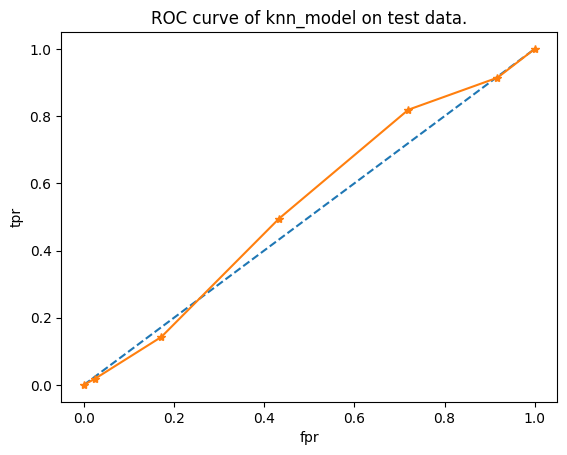

In [120]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of knn_model on test data.')

**Training Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.70 on the training set.
2. Class 0 metrics are moderate (precision=0.72, recall=0.68, F1-score=0.70), while Class 1 metrics are moderate (precision=0.68, recall=0.72, F1-score=0.70),
3. The ROC AUC score is 0.76, demonstrating moderate predictive power.

**Test Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.54 on the test set.
2. Class 0 metrics are weak (precision=0.63, recall=0.57, F1-score=0.60), while class 1 metrics are poor (precision=0.43, recall=0.50, F1-score=0.46).
3. The ROC AUC score is 0.53, demonstrating poor predictive power.

**Analysis:** The KNeighborsClassifier model exibits inconsistent performance across training and test sets, suggesting poor generalization capabilities. There is a drop in performance on the test set, particularly for class 1.

In [121]:
# Tuning the parameters of the knn_model for better performance.

grid_params = {
                'n_neighbors': [25, 30, 35, 40, 45],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [10, 15, 20, 25, 30]
}

grid_search = GridSearchCV(estimator = knn_model, param_grid = grid_params, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_knn_model = grid_search.best_estimator_

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 45}


In [122]:
# reg_knn_model prediction on train data

y_train_predict = reg_knn_model.predict(X_train)

In [123]:
# reg_knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,175,139
1,106,190


In [124]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       314
           1       0.58      0.64      0.61       296

    accuracy                           0.60       610
   macro avg       0.60      0.60      0.60       610
weighted avg       0.60      0.60      0.60       610



In [125]:
y_train_predict_prob = reg_knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_knn_model on train data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on train data: 0.6446623773454985


Text(0.5, 1.0, 'ROC curve of reg_knn_model on train data.')

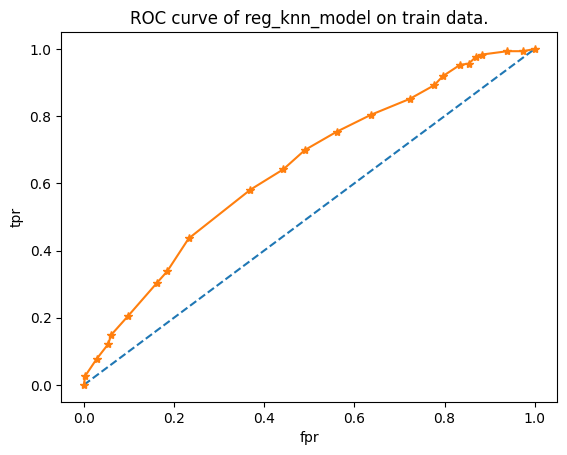

In [126]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_knn_model on train data.')

In [127]:
# reg_knn_model prediction on test data

y_test_predict = reg_knn_model.predict(X_test)

In [128]:
# reg_knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,78,79
1,38,67


In [129]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       157
           1       0.46      0.64      0.53       105

    accuracy                           0.55       262
   macro avg       0.57      0.57      0.55       262
weighted avg       0.59      0.55      0.56       262



In [130]:
y_test_predict_prob = reg_knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_knn_model on test data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on test data: 0.5662420382165605


Text(0.5, 1.0, 'ROC curve of reg_knn_model on test data.')

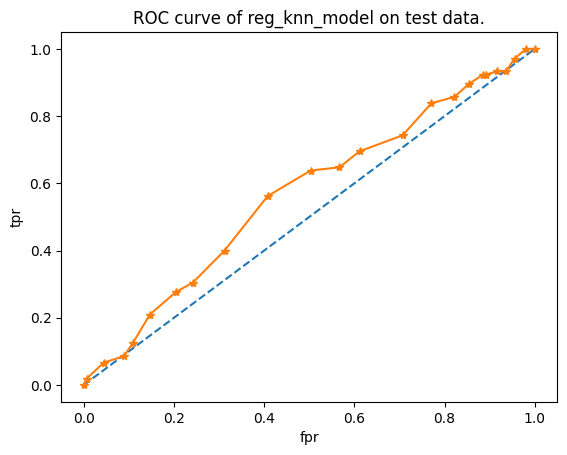

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_knn_model on test data.')

**Training Set Performance:**
1. The regularized KNeighborsClassifier model achieves an accuracy of 0.60 on the training set.
2. Metrics are poor for both Class 0 (precision=0.62, recall=0.56, F1-score=0.59) and Class 1 (precision=0.58, recall=0.64, F1-score=0.61),
3. The ROC AUC score is 0.64, demonstrating weak predictive power.

**Test Set Performance:**
1. The regularized KNeighborsClassifier model achieves an accuracy of 0.55 on the test set.
2. Metrics are poor for both Class 0 (precision=0.67, recall=0.50, F1-score=0.57) and class 1 (precision=0.46, recall=0.64, F1-score=0.53).
3. The ROC AUC score is 0.57, demonstrating poor predictive power.

**Analysis:** The regularized KNeighborsClassifier model exibits consistent performance across training and test sets, suggesting poor generalization capabilities. There is a drop in performance on the test set, particularly for class 1.

**GaussianNB model**

In [132]:
# GaussianNB model

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)

GaussianNB()

In [133]:
# gaussian_nb_model prediction on train data

y_train_predict = gaussian_nb_model.predict(X_train)

In [134]:
# gaussian_nb_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,158,156
1,58,238


In [135]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.50      0.60       314
           1       0.60      0.80      0.69       296

    accuracy                           0.65       610
   macro avg       0.67      0.65      0.64       610
weighted avg       0.67      0.65      0.64       610



In [136]:
y_train_predict_prob = gaussian_nb_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of gaussian_nb_model on train data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on train data: 0.7100189361335858


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on training data.')

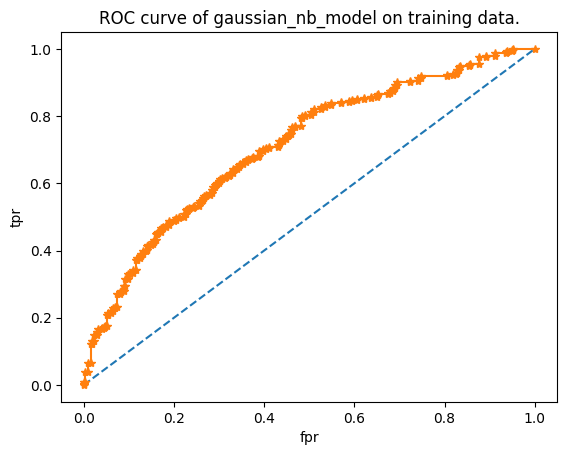

In [137]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of gaussian_nb_model on training data.')

In [138]:
# gaussian_nb_model prediction on test data

y_test_predict = gaussian_nb_model.predict(X_test)

In [139]:
# gaussian_nb_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,68,89
1,22,83


In [140]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55       157
           1       0.48      0.79      0.60       105

    accuracy                           0.58       262
   macro avg       0.62      0.61      0.57       262
weighted avg       0.65      0.58      0.57       262



In [141]:
y_test_predict_prob = gaussian_nb_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of gaussian_nb_model on test data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on test data: 0.6815286624203821


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on test data.')

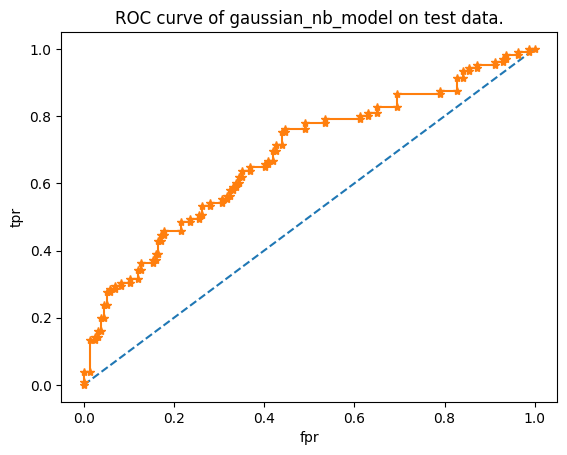

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of gaussian_nb_model on test data.')

**Training Set Performance:**
1. The GaussianNB model achieves an accuracy of 0.65 on the training set.
2. Metrics are weak for both Class 0 (precision=0.73, recall=0.50, F1-score=0.60) and Class 1 (precision=0.60, recall=0.80, F1-score=0.69),
3. The ROC AUC score is 0.71, demonstrating moderate predictive power.

**Test Set Performance:**
1. The GaussianNB model achieves an accuracy of 0.58 on the test set.
2. Class 0 metrics are poor (precision=0.76, recall=0.43, F1-score=0.55), while class 1 metrics are weak (precision=0.48, recall=0.79, F1-score=0.60).
3. The ROC AUC score is 0.68, demonstrating weak predictive power.

**Analysis:** The GaussianNB model exibits consistent performance across training and test sets, suggesting weak generalization capabilities. GaussianNB model shows a drop in performance on the test set, particularly for class 1.

**Decision Tree**

In [143]:
# Decision Tree Classifier

dtcl = DecisionTreeClassifier(criterion = 'gini', random_state = 121)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

In [144]:
from google.colab import drive

drive.mount('/content/drive')
file = open('/content/drive/My Drive/Colab Notebooks/holiday_package_tree.dot', 'w')
train_char_label = ['1', '0']
dot_data = export_graphviz(dtcl, out_file = file, feature_names = list(X_train), class_names = list(train_char_label))
file.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# dtcl prediction on train data

y_train_predict = dtcl.predict(X_train)

In [146]:
# dtcl performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,314,0
1,0,296


In [147]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       296

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



In [148]:
y_train_predict_prob = dtcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of dtcl on train data: {}'.format(roc_score))

roc_auc_score of dtcl on train data: 1.0


Text(0.5, 1.0, 'ROC curve of dtcl on training data.')

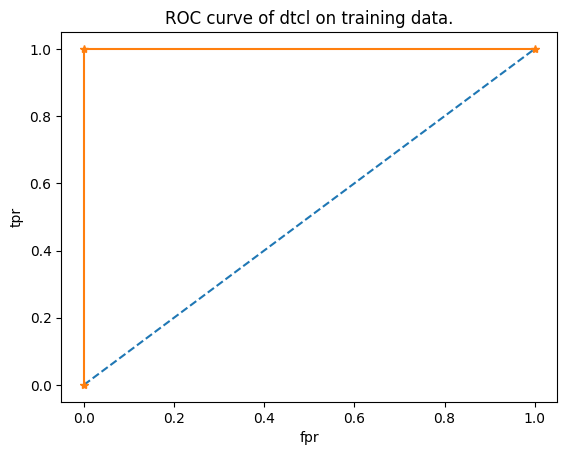

In [149]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of dtcl on training data.')

In [150]:
# dtcl prediction on test data

y_test_predict = dtcl.predict(X_test)

In [151]:
# dtcl performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,93,64
1,42,63


In [152]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       157
           1       0.50      0.60      0.54       105

    accuracy                           0.60       262
   macro avg       0.59      0.60      0.59       262
weighted avg       0.61      0.60      0.60       262



In [153]:
y_test_predict_prob = dtcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of dtcl on test data: {}'.format(roc_score))

roc_auc_score of dtcl on test data: 0.5961783439490446


Text(0.5, 1.0, 'ROC curve of dtcl on test data.')

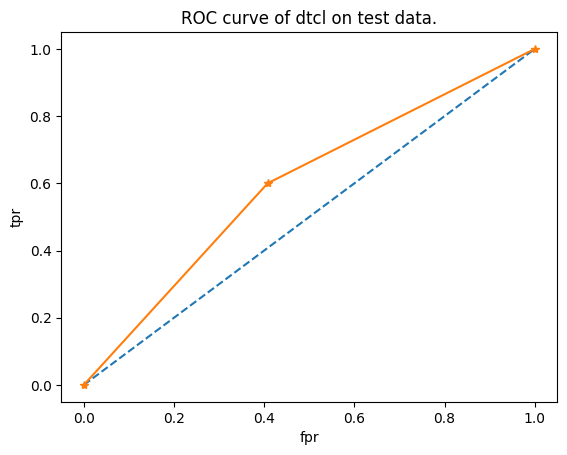

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of dtcl on test data.')

**Training Set Performance:**
1. The DecisionTreeClassifier model achieves an accuracy of 1.00 on the training set.
2. Metrics are outstanding for both Class 0 (precision=1.00, recall=1.00, F1-score=1.00) and Class 1 (precision=1.00, recall=1.00, F1-score=1.00),
3. The ROC AUC score is 1.00, demonstrating outstanding predictive power.

**Test Set Performance:**
1. The DecisionTreeClassifier model achieves an accuracy of 0.60 on the test set.
2. Class 0 metrics are weak (precision=0.69, recall=0.59, F1-score=0.64), while class 1 metrics are poor (precision=0.50, recall=0.60, F1-score=0.54).
3. The ROC AUC score is 0.60, demonstrating weak predictive power.

**Analysis:** The stark contrast between training and test performance suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data.

In [155]:
# Tuning the parameters of the dtcl for better performance.

params = {
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                'min_samples_split': [2, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                'max_features':[3, 4, 5, 'log2', 'sqrt']
}

grid_search = GridSearchCV(estimator = dtcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_dtcl_model = grid_search.best_estimator_

# reg_dtcl_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_leaf = 9, min_samples_split = 25, random_state = 121)
# Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 25}

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [156]:
# reg_dtcl_model prediction on train data

y_train_predict = reg_dtcl_model.predict(X_train)

In [157]:
# reg_dtcl_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,248,66
1,109,187


In [158]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       314
           1       0.74      0.63      0.68       296

    accuracy                           0.71       610
   macro avg       0.72      0.71      0.71       610
weighted avg       0.72      0.71      0.71       610



In [159]:
y_train_predict_prob = reg_dtcl_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on train data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on train data: 0.7743372353244965


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on training data.')

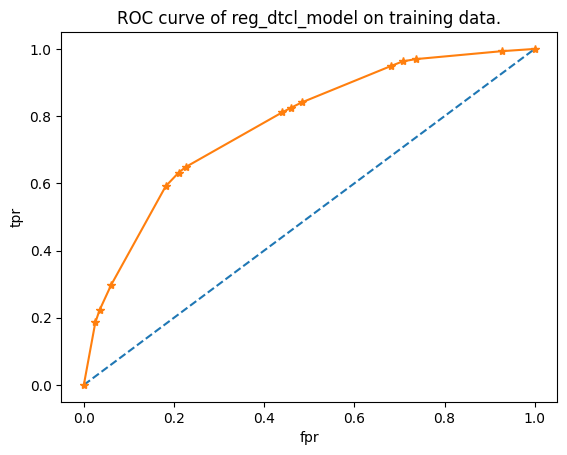

In [160]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_dtcl_model on training data.')

In [161]:
# reg_dtcl_model prediction on test data

y_test_predict = reg_dtcl_model.predict(X_test)

In [162]:
# reg_dtcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,115,42
1,41,64


In [163]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       157
           1       0.60      0.61      0.61       105

    accuracy                           0.68       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.68      0.68      0.68       262



In [164]:
y_test_predict_prob = reg_dtcl_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on test data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on test data: 0.7307552320291174


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on test data.')

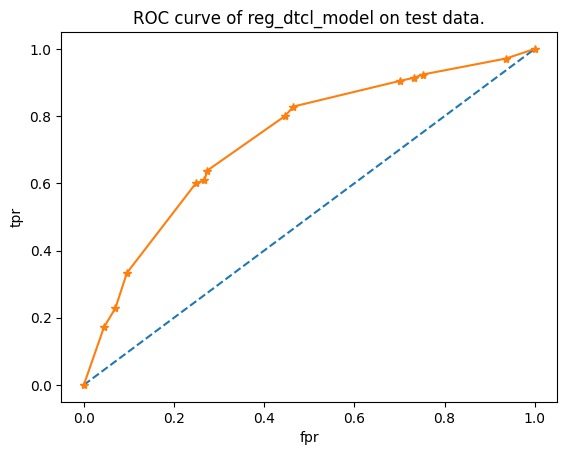

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_dtcl_model on test data.')

**Training Set Performance:**
1. The regularized DecisionTreeClassifier model achieves an accuracy of 0.71 on the training set.
2. Metrics for class 0 are moderate (precision=0.69, recall=0.79, F1-score=0.74), while class 1 metrics are weak (precision=0.74, recall=0.63, F1-score=0.68).
3. The ROC AUC score is 0.77, indicating moderate discrimination ability.

**Test Set Performance:**
1. The regularized DecisionTreeClassifier model achieves an accuracy of 0.68 on the test set.
2. Metrics for class 0 are moderate (precision=0.74, recall=0.73, F1-score=0.73), while class 1 metrics are weak (precision=0.60, recall=0.61, F1-score=0.61).
3. The ROC AUC score is 0.73, reflecting moderate generalization to unseen data.

**Analysis:** The regularized DecisionTreeClassifier model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

**Random Forest**

In [166]:
# Random Forest classifier

rfcl = RandomForestClassifier(random_state = 121)
rfcl.fit(X_train, y_train)

RandomForestClassifier(random_state=121)

In [167]:
# rfcl model prediction on train data

y_train_predict = rfcl.predict(X_train)

In [168]:
# rfcl model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,314,0
1,0,296


In [169]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       296

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



In [170]:
y_train_predict_prob = rfcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of rfcl model on train data: {}'.format(roc_score))

roc_auc_score of rfcl model on train data: 0.9999999999999999


Text(0.5, 1.0, 'ROC curve of rfcl model on training data.')

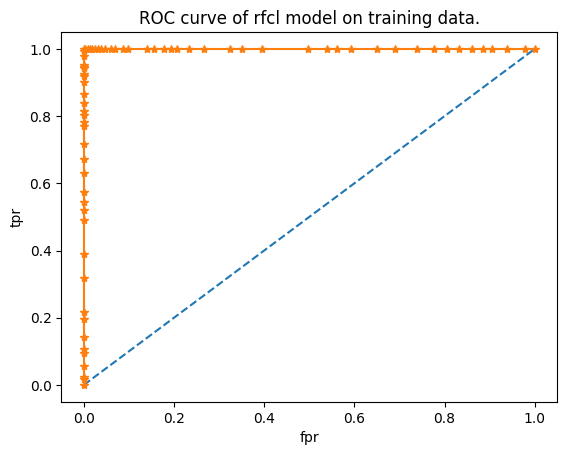

In [171]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of rfcl model on training data.')

In [172]:
# rfcl model prediction on test data

y_test_predict = rfcl.predict(X_test)

In [173]:
# rfcl model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,108,49
1,35,70


In [174]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       157
           1       0.59      0.67      0.62       105

    accuracy                           0.68       262
   macro avg       0.67      0.68      0.67       262
weighted avg       0.69      0.68      0.68       262



In [175]:
y_test_predict_prob = rfcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of rfcl model on test data: {}'.format(roc_score))

roc_auc_score of rfcl model on test data: 0.7283287837427965


Text(0.5, 1.0, 'ROC curve of rfcl model on test data.')

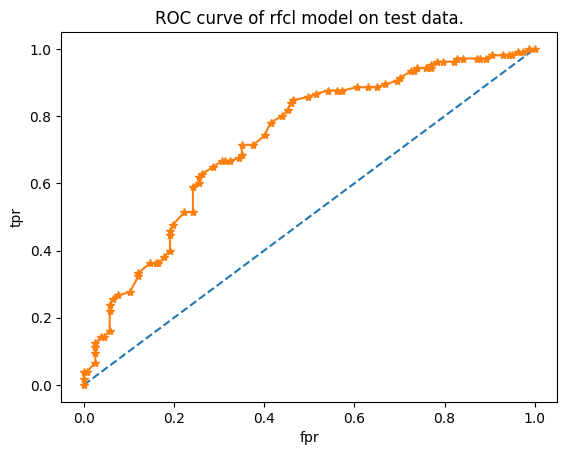

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of rfcl model on test data.')

**Training Set Performance:**
1. The RandomForest model achieves an accuracy of 1.00 on the training set.
2. Metrics are outstanding for both Class 0 (precision=1.00, recall=1.00, F1-score=1.00) and Class 1 (precision=1.00, recall=1.00, F1-score=1.00),
3. The ROC AUC score is 1.00, demonstrating outstanding predictive power.

**Test Set Performance:**
1. On the test set, the RandomForest model achieves an weak accuracy of 0.68 .
2. Class 0 metrics are moderate (precision=0.76, recall=0.69, F1-score=0.72), while class 1 metrics are weak (precision=0.59, recall=0.67, F1-score=0.62).
3. The ROC AUC score is 0.73, demonstrating moderate predictive power.

**Analysis:** The stark contrast between training and test performance suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data.

In [177]:
# Tuning the parameters of the rfcl for a regularized random forest classifier model for better performance.

reg_rfcl_model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 5, min_samples_leaf = 9, min_samples_split = 19, n_estimators = 100, random_state = 121)
reg_rfcl_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=9, min_samples_split=19,
                       random_state=121)

In [178]:
# reg_rfcl_model prediction on train data

y_train_predict = reg_rfcl_model.predict(X_train)

In [179]:
# reg_rfcl_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,248,66
1,62,234


In [180]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       314
           1       0.78      0.79      0.79       296

    accuracy                           0.79       610
   macro avg       0.79      0.79      0.79       610
weighted avg       0.79      0.79      0.79       610



In [181]:
y_train_predict_prob = reg_rfcl_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model on train data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model on train data: 0.8702982441039765


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model on training data.')

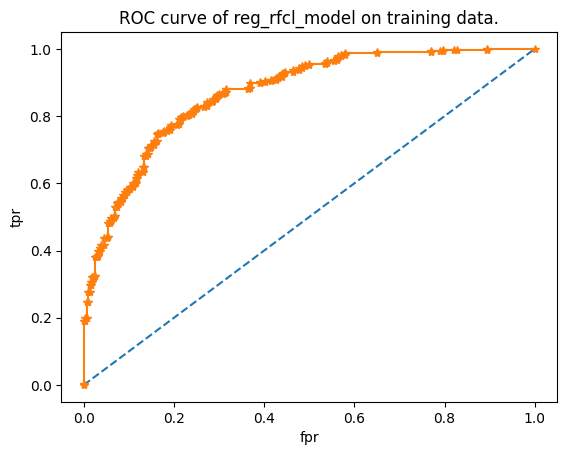

In [182]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_rfcl_model on training data.')

In [183]:
# reg_rfcl_model prediction on test data

y_test_predict = reg_rfcl_model.predict(X_test)

In [184]:
# reg_rfcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,108,49
1,32,73


In [185]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       157
           1       0.60      0.70      0.64       105

    accuracy                           0.69       262
   macro avg       0.68      0.69      0.69       262
weighted avg       0.70      0.69      0.69       262



In [186]:
y_test_predict_prob = reg_rfcl_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model on test data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model on test data: 0.7344858962693358


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model on test data.')

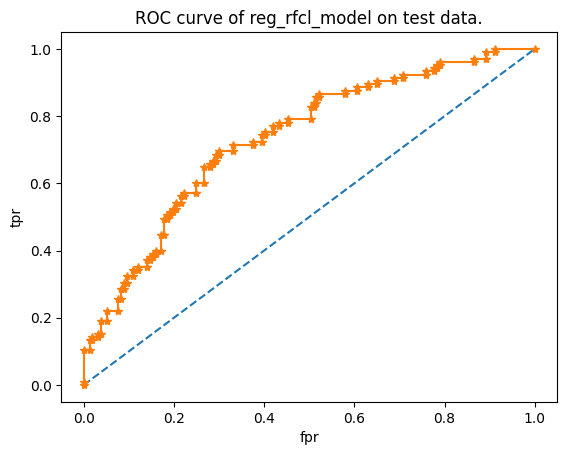

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_rfcl_model on test data.')

**Training Set Performance:**
1. The regularized RandomForest model achieves an accuracy of 0.79 on the training set.
2. Metrics are moderate for both class 0 (precision=0.80, recall=0.79, F1-score=0.79) and class 1 (precision=0.78, recall=0.79, F1-score=0.79).
3. The ROC AUC score is 0.87, indicating strong discrimination ability.

**Test Set Performance:**
1. The regularized RandomForest model achieves an accuracy of 0.69 on the test set.
2. Metrics for class 0 are moderate (precision=0.77, recall=0.69, F1-score=0.73), while class 1 metrics are weak (precision=0.60, recall=0.70, F1-score=0.64).
3. The ROC AUC score is 0.73, reflecting moderate generalization to unseen data.

**Analysis:** The regularized RandomForest model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

**Bagging Classifier**

In [188]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
}

bgcl = BaggingClassifier(estimator = reg_rfcl_model, random_state = 121)

grid_search = GridSearchCV(estimator = bgcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

bagging_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 45}

Best Hyperparameters: {'n_estimators': 45}


In [189]:
# bagging_model prediction on train data

y_train_predict = bagging_model.predict(X_train)

In [190]:
# bagging_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,243,71
1,80,216


In [191]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       314
           1       0.75      0.73      0.74       296

    accuracy                           0.75       610
   macro avg       0.75      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610



In [192]:
y_train_predict_prob = bagging_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of bagging_model on train data: {}'.format(roc_score))

roc_auc_score of bagging_model on train data: 0.8341689619555862


Text(0.5, 1.0, 'ROC curve of bagging_model on training data.')

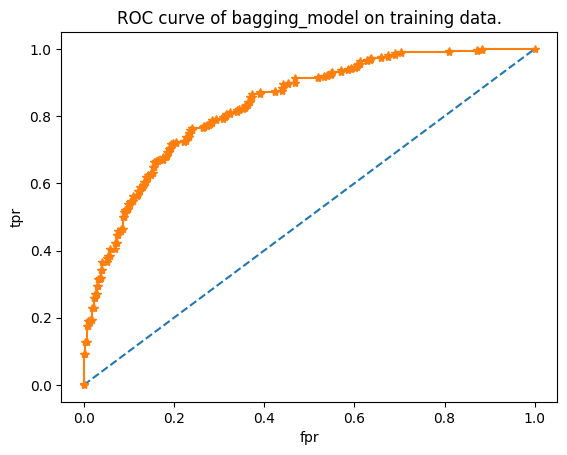

In [193]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of bagging_model on training data.')

In [194]:
# bagging_model prediction on test data

y_test_predict = bagging_model.predict(X_test)

In [195]:
# bagging_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,107,50
1,32,73


In [196]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       157
           1       0.59      0.70      0.64       105

    accuracy                           0.69       262
   macro avg       0.68      0.69      0.68       262
weighted avg       0.70      0.69      0.69       262



In [197]:
y_test_predict_prob = bagging_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of bagging_model on test data: {}'.format(roc_score))

roc_auc_score of bagging_model on test data: 0.7333333333333333


Text(0.5, 1.0, 'ROC curve of bagging_model on test data.')

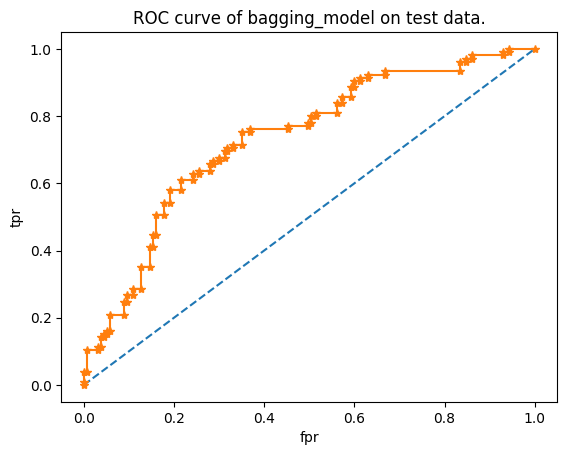

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of bagging_model on test data.')

**Training Set Performance:**
1. The Bagging model achieves an accuracy of 0.75 on the training set.
2. Metrics are moderate for both class 0 (precision=0.75, recall=0.77, F1-score=0.76) and class 1 (precision=0.75, recall=0.73, F1-score=0.74).
3. The ROC AUC score is 0.83, indicating strong discrimination ability.

**Test Set Performance:**
1. The Bagging model achieves an accuracy of 0.69 on the test set.
2. Metrics for class 0 are moderate (precision=0.77, recall=0.68, F1-score=0.72), while class 1 metrics are weak (precision=0.59, recall=0.70, F1-score=0.64).
3. The ROC AUC score is 0.73, reflecting moderate generalization to unseen data.

**Analysis:** The regularized RandomForest model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

**AdaBoostClassifier**

In [199]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100, 150]
}

adaboost_clf = AdaBoostClassifier(random_state = 121)

grid_search = GridSearchCV(estimator = adaboost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

adaboost_model = grid_search.best_estimator_

Best Hyperparameters: {'n_estimators': 90}


In [200]:
# adaboost_model prediction on train data

y_train_predict = adaboost_model.predict(X_train)

In [201]:
# adaboost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,222,92
1,88,208


In [202]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       314
           1       0.69      0.70      0.70       296

    accuracy                           0.70       610
   macro avg       0.70      0.70      0.70       610
weighted avg       0.71      0.70      0.70       610



In [203]:
y_train_predict_prob = adaboost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of adaboost_model on train data: {}'.format(roc_score))

roc_auc_score of adaboost_model on train data: 0.7795231537269753


Text(0.5, 1.0, 'ROC curve of adaboost_model on training data.')

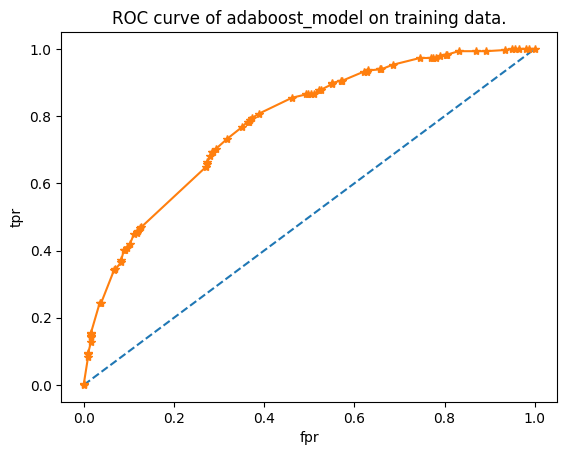

In [204]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of adaboost_model on training data.')

In [205]:
# adaboost_model prediction on test data

y_test_predict = adaboost_model.predict(X_test)

In [206]:
# adaboost_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,104,53
1,31,74


In [207]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       157
           1       0.58      0.70      0.64       105

    accuracy                           0.68       262
   macro avg       0.68      0.68      0.68       262
weighted avg       0.70      0.68      0.68       262



In [208]:
y_test_predict_prob = adaboost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of adaboost_model on test data: {}'.format(roc_score))

roc_auc_score of adaboost_model on test data: 0.7310585380649075


Text(0.5, 1.0, 'ROC curve of adaboost_model on test data.')

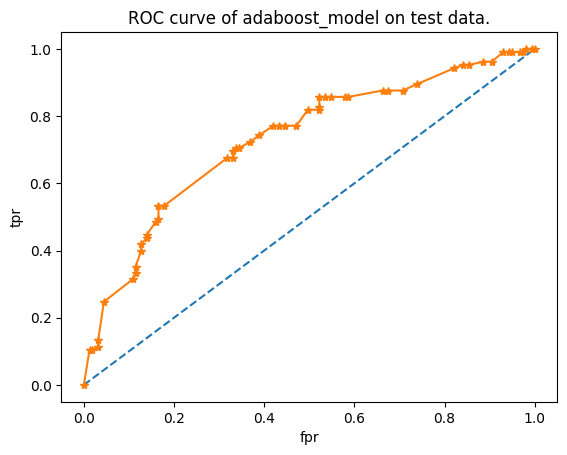

In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of adaboost_model on test data.')

**Training Set Performance:**
1. The AdaBoost model achieves an accuracy of 0.70 on the training set.
2. Metrics are moderate for both class 0 (precision=0.72, recall=0.71,F1-score=0.71) and class 1 (precision=0.69, recall=0.70, F1-score=0.70).
3. The ROC AUC score is 0.78, indicating moderate discrimination ability.

**Test Set Performance:**
1. The AdaBoost model achieves an accuracy of 0.68 on the test set.
2. Metrics for class 0 are moderate (precision=0.77, recall=0.66, F1-score=0.71), while class 1 metrics are weak (precision=0.58, recall=0.70, F1-score=0.64).
3. The ROC AUC score is 0.73, reflecting moderate generalization to unseen data.

**Analysis:** The regularized RandomForest model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

**GradientBoostingClassifier**

In [210]:
params = {
                'n_estimators' : [10, 20, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]
}

gradient_boost_clf = GradientBoostingClassifier(random_state = 121)

grid_search = GridSearchCV(estimator = gradient_boost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

grad_boost_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 10}

Best Hyperparameters: {'n_estimators': 10}


In [211]:
# grad_boost_model prediction on train data

y_train_predict = grad_boost_model.predict(X_train)

In [212]:
# grad_boost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,236,78
1,92,204


In [213]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       314
           1       0.72      0.69      0.71       296

    accuracy                           0.72       610
   macro avg       0.72      0.72      0.72       610
weighted avg       0.72      0.72      0.72       610



In [214]:
y_train_predict_prob = grad_boost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of grad_boost_model on train data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on train data: 0.8013050869340679


Text(0.5, 1.0, 'ROC curve of grad_boost_model on training data.')

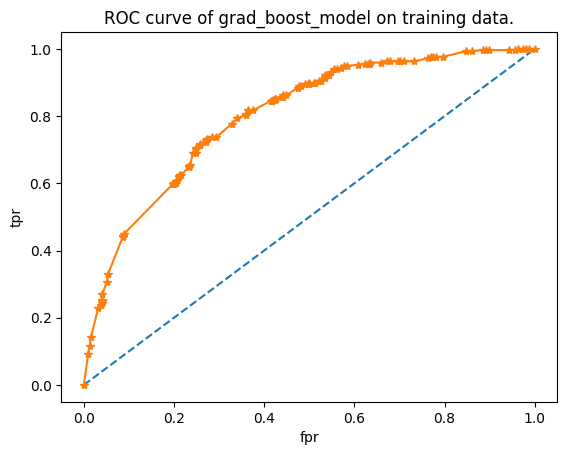

In [215]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of grad_boost_model on training data.')

In [216]:
# grad_boost_model prediction on test data

y_test_predict = grad_boost_model.predict(X_test)

In [217]:
# grad_boost_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,107,50
1,31,74


In [218]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       157
           1       0.60      0.70      0.65       105

    accuracy                           0.69       262
   macro avg       0.69      0.69      0.69       262
weighted avg       0.70      0.69      0.69       262



In [219]:
y_test_predict_prob = grad_boost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of grad_boost_model on test data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on test data: 0.7545647558386412


Text(0.5, 1.0, 'ROC curve of grad_boost_model on test data.')

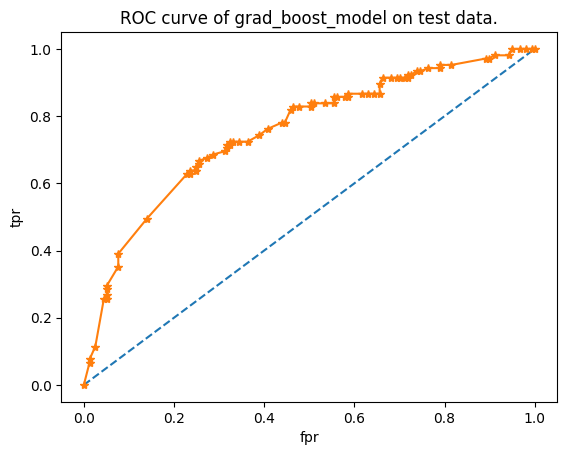

In [220]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of grad_boost_model on test data.')

**Training Set Performance:**
1. The GradientBoostingClassifier model achieves an accuracy of 0.72 on the training set.
2. Metrics are moderate for both class 0 (precision=0.72, recall=0.75, F1-score=0.74) and class 1 (precision=0.72, recall=0.69, F1-score=0.71).
3. The ROC AUC score is 0.80, indicating strong discrimination ability.

**Test Set Performance:**
1. The GradientBoostingClassifier model achieves an accuracy of 0.69 on the test set.
2. Metrics for class 0 are moderate (precision=0.78, recall=0.68, F1-score=0.73), while class 1 metrics are weak (precision=0.60, recall=0.70, F1-score=0.65).
3. The ROC AUC score is 0.75, reflecting moderate generalization to unseen data.

**Analysis:** The GradientBoostingClassifier model maintains consistent performance across training and test sets, suggesting moderate generalization capabilities. There is a drop in performance on the test set, particularly for class 1, indicating challenges in handling imbalanced data.

**Artificial Neural Network**

In [221]:
mlp_model = MLPClassifier(random_state = 121)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=121)

In [222]:
# mlp_model prediction on train data

y_train_predict = mlp_model.predict(X_train)

In [223]:
# mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,314,0
1,295,1


In [224]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       314
           1       1.00      0.00      0.01       296

    accuracy                           0.52       610
   macro avg       0.76      0.50      0.34       610
weighted avg       0.75      0.52      0.35       610



In [225]:
y_train_predict_prob = mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of mlp_model on train data: {}'.format(roc_score))

roc_auc_score of mlp_model on train data: 0.6220519882940265


Text(0.5, 1.0, 'ROC curve of mlp_model on training data.')

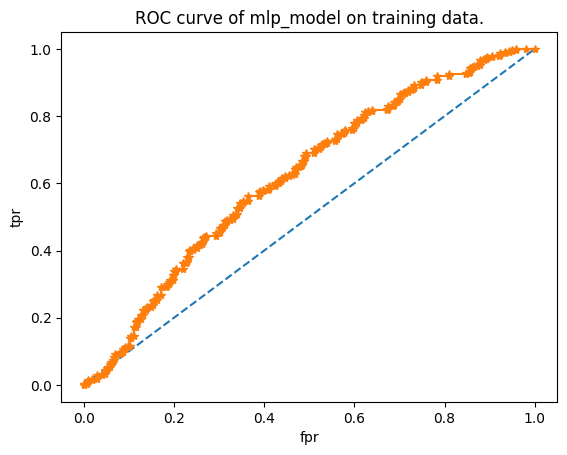

In [226]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of mlp_model on training data.')

In [227]:
# mlp_model prediction on test data

y_test_predict = mlp_model.predict(X_test)

In [228]:
# mlp_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,157,0
1,105,0


In [229]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       157
           1       0.00      0.00      0.00       105

    accuracy                           0.60       262
   macro avg       0.30      0.50      0.37       262
weighted avg       0.36      0.60      0.45       262



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [230]:
y_test_predict_prob = mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of mlp_model on train data: {}'.format(roc_score))

roc_auc_score of mlp_model on train data: 0.5642098877767668


Text(0.5, 1.0, 'ROC curve of mlp_model on test data.')

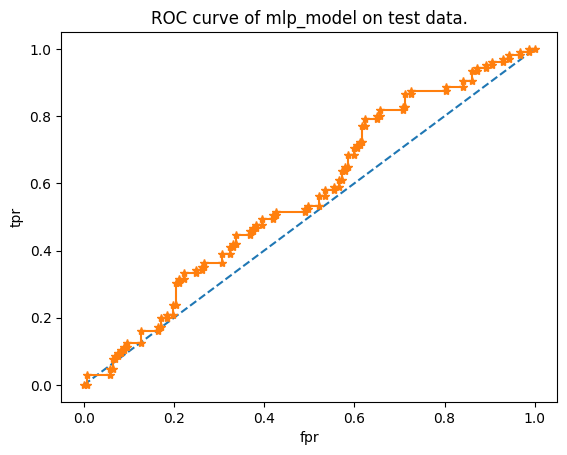

In [231]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of mlp_model on test data.')

**Training Set Performance:**
1. The MLPClassifier model achieves an accuracy of 0.52 on the training set.
2. Metrics for class 0 are weak (precision=0.52, recall=1.00, F1-score=0.68), while class 1 metrics are poor (precision=1.00, recall=0.00, F1-score=0.01).
3. The ROC AUC score is 0.62, indicating weak discrimination ability.

**Test Set Performance:**
1. The MLPClassifier model achieves an accuracy of 0.60 on the test set.
2. Metrics for class 0 are moderate (precision=0.60, recall=1.00, F1-score=0.75), while class 1 metrics are poor (precision=0.00, recall=0.00, F1-score=0.00).
3. The ROC AUC score is 0.56, reflecting poor generalization to unseen data.

**Analysis:** The MLPClassifier model exhibits poor performance across training and test sets, it shows highly bias towards Class 0 and a poor classifier of Class 1 in both train and test set.

In [232]:
# Tuning the parameters of the mlp_model for better performance.

params = {
    'hidden_layer_sizes': [(100), (150), (100, 50), (150, 75), (100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
		'learning_rate_init': [0.1, 0.001, 0.0001],
    'tol': [0.1, 0.01, 0.001],
    'max_iter' : [1000, 4000, 7000, 10000],
		'early_stopping':[True, False]
}

grid_search = GridSearchCV(estimator = mlp_model, param_grid = params, cv = 5, scoring = 'accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_mlp_model = grid_search.best_estimator_

# Best Hyperparameters: {'activation': 'relu', 'early_stopping': False, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.0001, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}

Best Hyperparameters: {'activation': 'relu', 'early_stopping': False, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.0001, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [233]:
# reg_mlp_model prediction on train data

y_train_predict = reg_mlp_model.predict(X_train)

In [234]:
# reg_mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,277,37
1,258,38


In [235]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.52      0.88      0.65       314
           1       0.51      0.13      0.20       296

    accuracy                           0.52       610
   macro avg       0.51      0.51      0.43       610
weighted avg       0.51      0.52      0.44       610



In [236]:
y_train_predict_prob = reg_mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on train data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on train data: 0.6117339473231193


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on training data.')

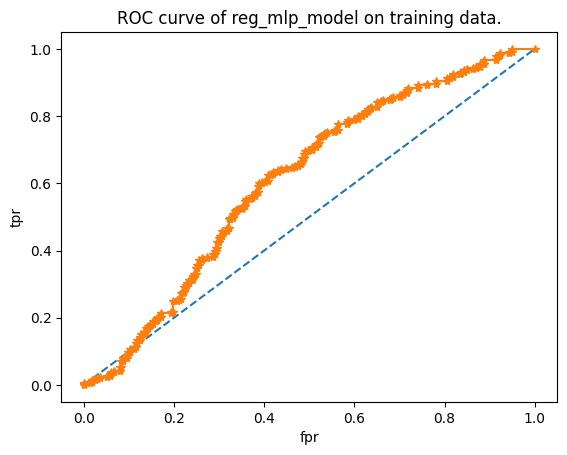

In [237]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_mlp_model on training data.')

In [238]:
# reg_mlp_model prediction on train data

y_test_predict = reg_mlp_model.predict(X_test)

In [239]:
# reg_mlp_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,138,19
1,93,12


In [240]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       157
           1       0.39      0.11      0.18       105

    accuracy                           0.57       262
   macro avg       0.49      0.50      0.44       262
weighted avg       0.51      0.57      0.50       262



In [241]:
y_test_predict_prob = reg_mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on test data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on test data: 0.5202911737943584


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on test data.')

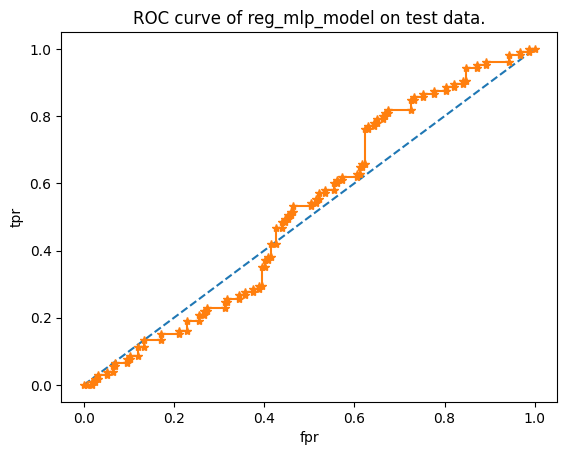

In [242]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_mlp_model on test data.')

**Training Set Performance:**
1. The regularized MLPClassifier model achieves an accuracy of 0.52 on the training set.
2. Metrics for class 0 are weak (precision=0.52, recall=0.88, F1-score=0.65), while class 1 metrics are poor (precision=0.51, recall=0.13, F1-score=0.20).
3. The ROC AUC score is 0.61, indicating weak discrimination ability.

**Test Set Performance:**
1. The regularized MLPClassifier model achieves an accuracy of 0.57 on the test set.
2. Metrics for class 0 are moderate (precision=0.60, recall=0.88, F1-score=0.71), while class 1 metrics are poor (precision=0.39, recall=0.11, F1-score=0.18).
3. The ROC AUC score is 0.52, reflecting poor generalization to unseen data.

**Analysis:** The regularized MLPClassifier model maintains consistent performance across training and test sets, it shows highly bias towards Class 0 and a poor classifier of Class 1 in both train and test set.

Best model:

---
Based on the provided analysis, the **GradientBoostingClassifier** appears to have the optimum performance on the dataset .

Reasons:

1.  **Balanced Performance:** It maintains consistent performance across both training and test datasets, suggesting good generalization.

2.   **Relatively High ROC AUC Score:** The GradientBoostingClassifier achieves a ROC AUC score of 0.80 on the training data and 0.75 on the test data, demonstrating a strong discrimination ability .

3.   **Accounts for Imbalanced Data:** While there's a performance drop for class 1 on the test set (as seen in other models), GradientBoostingClassifier handles the imbalanced data better than the Artificial Neural Network (MLPClassifier) .

While the RandomForest model also shows good performance, the GradientBoostingClassifier is chosen for its balance between performance and generalization.